###                                                     AIRBNB DATA ANALYSIS

### IMPORTING LIBRARIES

In [57]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings(action="ignore")

###  DATA READING

#### According to the business requirement, we need to collect relevant and meaningful data to perform analysis.

In [58]:
data1 = pd.read_csv("C:\\Users\\josin\OneDrive\\Desktop\\DA Portfolio Projects\\Air BnB Data Analysis\\Dataset\\listings1.csv")

In [59]:
data2  = pd.read_csv("C:\\Users\\josin\OneDrive\\Desktop\\DA Portfolio Projects\\Air BnB Data Analysis\\Dataset\\listings2.csv")

In [60]:
data1.head()

id                                            name  host_id  \
0      6  Large Craftsmen w/ yard ~ Perfect for families       29   
1   5570                   Ocean front condo on the sand     8435   
2   8095                            Sunset Cliffs Studio      270   
3  39516                 Art Studio Retreat/Rustic Cabin   169649   
4  45429                 OB cottage SD--view on waterway   197919   

                           host_name  neighbourhood_group neighbourhood  \
0                               Sara                  NaN   North Hills   
1  Jef Karchin'S MISSIONBEACHRETREAT                  NaN   Mission Bay   
2                              Marin                  NaN   Ocean Beach   
3                    Chris  And Jean                  NaN   North Hills   
4                            Melissa                  NaN   Loma Portal   

    latitude   longitude        room_type  price  minimum_nights  \
0  32.753993 -117.129705  Entire home/apt    295               2   
1  32.784304 -117.252578  Entire home/apt   2050               3   
2  32.735170 -117.243793  Entire home/apt     84               2   
3  32.731884 -117.119180  Entire home/apt     69               3   
4  32.748768 -117.229371  Entire home/apt    160               2   

   number_of_reviews last_review  reviews_per_month  \
0                149  2018-10-07               1.18   
1                  0         NaN                NaN   
2                178  2015-11-02               1.56   
3                338  2018-11-07               3.33   
4                  6  2014-07-28               0.06   

   calculated_host_listings_count  availability_365  
0                               1                20  
1                               2               328  
2                               1                 0  
3                               1               273  
4                               1               363

In [61]:
data2.head()

id                         listing_url       scrape_id last_scraped  \
0      6      https://www.airbnb.com/rooms/6  20181115100559   2018-11-15   
1   5570   https://www.airbnb.com/rooms/5570  20181115100559   2018-11-15   
2   8095   https://www.airbnb.com/rooms/8095  20181115100559   2018-11-15   
3  39516  https://www.airbnb.com/rooms/39516  20181115100559   2018-11-15   
4  45429  https://www.airbnb.com/rooms/45429  20181115100559   2018-11-15   

                                             name  \
0  Large Craftsmen w/ yard ~ Perfect for families   
1                   Ocean front condo on the sand   
2                            Sunset Cliffs Studio   
3                 Art Studio Retreat/Rustic Cabin   
4                 OB cottage SD--view on waterway   

                                             summary  \
0  Our Beautiful Craftsmen house has all the mode...   
1  Missionbeachretreat.   Great Ocean Front Condo...   
2                                                NaN   
3  We love having explorers from all over the wor...   
4  This charming independent cottage nestles besi...   

                                               space  \
0  We are located in the heart of North Park, the...   
1  This charming two bedroom beachfront condomini...   
2  Newly renovated, detached studio with private ...   
3  Nestled in South/North Park, a gentrified neig...   
4   This 1 bd ~500 sq ft. ground level, independe...   

                                         description experiences_offered  \
0  Our Beautiful Craftsmen house has all the mode...                none   
1  Missionbeachretreat.   Great Ocean Front Condo...                none   
2  Newly renovated, detached studio with private ...                none   
3  We love having explorers from all over the wor...                none   
4  This charming independent cottage nestles besi...                none   

                               neighborhood_overview  ... requires_license  \
0  We have the best Neighborhood in San Diego, in...  ...                f   
1  While some may compare San Diego’s Mission Bea...  ...                f   
2  proximity to ocean , walkability to ocean beac...  ...                f   
3  We love our eclectic neighborhood, with a smal...  ...                f   
4                                                NaN  ...                f   

  license                                 jurisdiction_names instant_bookable  \
0     NaN  {"SAN DIEGO"," SAN DIEGO TOURISM MARKETING DIS...                t   
1     NaN  {"SAN DIEGO"," SAN DIEGO TOURISM MARKETING DIS...                f   
2     NaN  {"SAN DIEGO"," SAN DIEGO TOURISM MARKETING DIS...                f   
3     NaN  {"SAN DIEGO"," SAN DIEGO TOURISM MARKETING DIS...                f   
4     NaN  {"SAN DIEGO"," SAN DIEGO TOURISM MARKETING DIS...                f   

  is_business_travel_ready          cancellation_policy  \
0                        f  strict_14_with_grace_period   
1                        f  strict_14_with_grace_period   
2                        f  strict_14_with_grace_period   
3                        f  strict_14_with_grace_period   
4                        f                     moderate   

   require_guest_profile_picture require_guest_phone_verification  \
0                              f                                f   
1                              f                                f   
2                              f                                f   
3                              t                                f   
4                              f                                f   

   calculated_host_listings_count  reviews_per_month  
0                               1               1.18  
1                               2                NaN  
2                               1               1.56  
3                               1               3.33  
4                               1               0.06  

[5 rows x 96 columns]

#### Joining Two files (Left Join)

In [62]:
merge_data = pd.merge(data1,data2[['id','city','amenities', 'monthly_price', 'property_type']],on = 'id', how = 'left')

In [63]:
listings_data = merge_data

In [64]:
reviews_data = pd.read_csv('C:\\Users\\josin\\OneDrive\\Desktop\\DA Portfolio Projects\\Air BnB Data Analysis\Dataset\\reviews.csv')
reviews_data.head()

listing_id       id        date  reviewer_id reviewer_name  \
0           6        8  2008-06-22          415      Terrence   
1           6     4383  2009-06-22         3762     Christine   
2           6  1722383  2012-07-16      1864778          Hieu   
3           6  5595071  2013-07-07       117966        Daryna   
4           6  5631156  2013-07-08      6563815        Mathew   

                                            comments  
0  Sara is an awesome hostess.  She was very cons...  
1  My stay at “Craftsmen” was wonderful!  Sara wa...  
2  This was my first time using Airbnb and Sara m...  
3  Sara was a very pleasant host! Reservation was...  
4  Sara was such an amazing hostess! My girlfrien...

### EXPLORATORY DATA ANALYSIS

In [65]:
listings_data.head()

id                                            name  host_id  \
0      6  Large Craftsmen w/ yard ~ Perfect for families       29   
1   5570                   Ocean front condo on the sand     8435   
2   8095                            Sunset Cliffs Studio      270   
3  39516                 Art Studio Retreat/Rustic Cabin   169649   
4  45429                 OB cottage SD--view on waterway   197919   

                           host_name  neighbourhood_group neighbourhood  \
0                               Sara                  NaN   North Hills   
1  Jef Karchin'S MISSIONBEACHRETREAT                  NaN   Mission Bay   
2                              Marin                  NaN   Ocean Beach   
3                    Chris  And Jean                  NaN   North Hills   
4                            Melissa                  NaN   Loma Portal   

    latitude   longitude        room_type  price  minimum_nights  \
0  32.753993 -117.129705  Entire home/apt    295               2   
1  32.784304 -117.252578  Entire home/apt   2050               3   
2  32.735170 -117.243793  Entire home/apt     84               2   
3  32.731884 -117.119180  Entire home/apt     69               3   
4  32.748768 -117.229371  Entire home/apt    160               2   

   number_of_reviews last_review  reviews_per_month  \
0                149  2018-10-07               1.18   
1                  0         NaN                NaN   
2                178  2015-11-02               1.56   
3                338  2018-11-07               3.33   
4                  6  2014-07-28               0.06   

   calculated_host_listings_count  availability_365       city  \
0                               1                20  San Diego   
1                               2               328  San Diego   
2                               1                 0  San Diego   
3                               1               273  San Diego   
4                               1               363  San Diego   

                                           amenities monthly_price  \
0  {TV,Internet,Wifi,"Air conditioning",Kitchen,"...           NaN   
1  {TV,"Cable TV",Internet,Wifi,Kitchen,"Free par...           NaN   
2  {Internet,Wifi,Kitchen,"Free parking on premis...           NaN   
3  {Internet,Wifi,Pool,Kitchen,"Pets live on this...           NaN   
4  {TV,Internet,Wifi,Kitchen,"Free parking on pre...           NaN   

  property_type  
0         House  
1   Condominium  
2    Guesthouse  
3    Tiny house  
4         House

In [66]:
listings_data.shape

(11922, 20)

In [67]:
listings_data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'city', 'amenities', 'monthly_price',
       'property_type'],
      dtype='object')

In [68]:
listings_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11922 entries, 0 to 11921
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              11922 non-null  int64  
 1   name                            11920 non-null  object 
 2   host_id                         11922 non-null  int64  
 3   host_name                       11916 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   11922 non-null  object 
 6   latitude                        11922 non-null  float64
 7   longitude                       11922 non-null  float64
 8   room_type                       11922 non-null  object 
 9   price                           11922 non-null  int64  
 10  minimum_nights                  11922 non-null  int64  
 11  number_of_reviews               11922 non-null  int64  
 12  last_review                     

#### Here, We can see that data type of monthly_price is object

#### Categorical Variables

In [69]:
# list of Categorical Variables

categorical_features = [feature for feature in listings_data.columns if listings_data[feature].dtypes == 'O']
print('Number of Categorical Variables: ', len(categorical_features))

# Visualise the Categorical variables

listings_data[categorical_features].head()

Number of Categorical Variables:  9


name  \
0  Large Craftsmen w/ yard ~ Perfect for families   
1                   Ocean front condo on the sand   
2                            Sunset Cliffs Studio   
3                 Art Studio Retreat/Rustic Cabin   
4                 OB cottage SD--view on waterway   

                           host_name neighbourhood        room_type  \
0                               Sara   North Hills  Entire home/apt   
1  Jef Karchin'S MISSIONBEACHRETREAT   Mission Bay  Entire home/apt   
2                              Marin   Ocean Beach  Entire home/apt   
3                    Chris  And Jean   North Hills  Entire home/apt   
4                            Melissa   Loma Portal  Entire home/apt   

  last_review       city                                          amenities  \
0  2018-10-07  San Diego  {TV,Internet,Wifi,"Air conditioning",Kitchen,"...   
1         NaN  San Diego  {TV,"Cable TV",Internet,Wifi,Kitchen,"Free par...   
2  2015-11-02  San Diego  {Internet,Wifi,Kitchen,"Free parking on premis...   
3  2018-11-07  San Diego  {Internet,Wifi,Pool,Kitchen,"Pets live on this...   
4  2014-07-28  San Diego  {TV,Internet,Wifi,Kitchen,"Free parking on pre...   

  monthly_price property_type  
0           NaN         House  
1           NaN   Condominium  
2           NaN    Guesthouse  
3           NaN    Tiny house  
4           NaN         House

#### Numerical Variables

In [70]:
# list of numerical variables

numerical_features = [feature for feature in listings_data.columns if listings_data[feature].dtypes != 'O']
print('Number of Numerical Variables: ', len(numerical_features))

# Visualise the numerical variables

listings_data[numerical_features].head()

Number of Numerical Variables:  11


id  host_id  neighbourhood_group   latitude   longitude  price  \
0      6       29                  NaN  32.753993 -117.129705    295   
1   5570     8435                  NaN  32.784304 -117.252578   2050   
2   8095      270                  NaN  32.735170 -117.243793     84   
3  39516   169649                  NaN  32.731884 -117.119180     69   
4  45429   197919                  NaN  32.748768 -117.229371    160   

   minimum_nights  number_of_reviews  reviews_per_month  \
0               2                149               1.18   
1               3                  0                NaN   
2               2                178               1.56   
3               3                338               3.33   
4               2                  6               0.06   

   calculated_host_listings_count  availability_365  
0                               1                20  
1                               2               328  
2                               1                 0  
3                               1               273  
4                               1               363

#### Duplicate Values

In [71]:
listings_data.duplicated().sum()

0

#### Missing Values

In [72]:
listings_data.isnull().sum()

id                                    0
name                                  2
host_id                               0
host_name                             6
neighbourhood_group               11922
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        2160
reviews_per_month                  2163
calculated_host_listings_count        0
availability_365                      0
city                                  0
amenities                             0
monthly_price                     10879
property_type                         0
dtype: int64

In [73]:
null_features=[feature for feature in listings_data.columns if listings_data[feature].isnull().sum()>=1]

for feature in null_features:
    print("{}: {}% missing values".format(feature,np.round(listings_data[feature].isnull().mean(),4)*100))

name: 0.02% missing values
host_name: 0.05% missing values
neighbourhood_group: 100.0% missing values
last_review: 18.12% missing values
reviews_per_month: 18.14% missing values
monthly_price: 91.25% missing values


In [74]:
null_features=[feature for feature in listings_data.columns if listings_data[feature].isnull().sum()>=1]

for feature in null_features:
    print("{} : {} missing values".format(feature,np.round(listings_data[feature].isnull().sum())))

name : 2 missing values
host_name : 6 missing values
neighbourhood_group : 11922 missing values
last_review : 2160 missing values
reviews_per_month : 2163 missing values
monthly_price : 10879 missing values


### Insights from Exploratory Data Analysis


* Number of Variables/ Features = 20
* Number of Rows/Records = 11922
* Duplicate Rows = 0
* Number of Numerical Features = 11
* Number of Categorical Features = 9
* Number of Features with Null Values = 6

#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### DATA PREPARATION & CLEANING

#### HANDLING NULL OR MISSING VALUES

<AxesSubplot:>

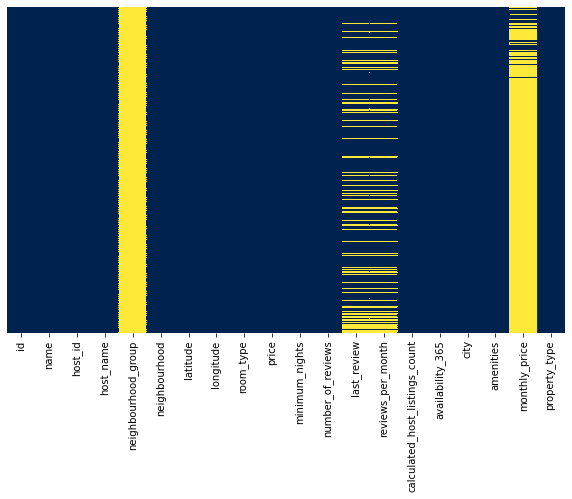

In [75]:
# Plotting the Missing Data on HeatMap 

plt.figure(figsize=(10,6))
sns.heatmap(listings_data.isnull(), yticklabels = False, cmap="cividis", cbar = False)

In [76]:
null_features=[feature for feature in listings_data.columns if listings_data[feature].isnull().sum()>=1]

for feature in null_features:
    print("{}: {}% missing values".format(feature,np.round(listings_data[feature].isnull().mean(),4)*100))

name: 0.02% missing values
host_name: 0.05% missing values
neighbourhood_group: 100.0% missing values
last_review: 18.12% missing values
reviews_per_month: 18.14% missing values
monthly_price: 91.25% missing values


#### From the heatmap and the above code it is evident that the neighbourhood_group has 100% missing values, so we can remove this column

In [77]:
listings_data.drop(labels = 'neighbourhood_group', axis = 'columns', inplace = True)

#### Handling the null values in the 'name' column, only 0.02% missing values are there. Since it is a categorical variable we can impute the null values with mode. 

In [78]:
listings_data['name'].unique()

array(['Large Craftsmen w/ yard ~ Perfect for families',
       'Ocean front condo on the sand', 'Sunset Cliffs Studio', ...,
       'Clean\nBright and Simple', 'Cozy pillow top air mattress',
       'Cozy bedroom'], dtype=object)

In [79]:
# Calcualting the mode of 'name' attribute
mode = listings_data["name"].mode()
mode

0      Home away from home
1      San Diego Apartment
2    San Diego Condominium
3          San Diego House
dtype: object

In [80]:
listings_data['name'].value_counts()

San Diego Apartment                                  6
San Diego House                                      6
San Diego Condominium                                6
Home away from home                                  6
Pinnacle Proper ⚾ Steps To Petco Park                5
                                                    ..
2nd Story Master Bedroom Suite w/ views!             1
2 cozy and charming  BR @Camino Del Sur/San Diego    1
Cozy Room in the heart of San Diego                  1
Cozy room with private bathroom in Mira Mesa         1
Villa Tiara Elite                                    1
Name: name, Length: 11780, dtype: int64

In [81]:
#Now,Checking the Occurence of the Data 

listings_data['name'].value_counts().head()

San Diego Apartment                      6
San Diego House                          6
San Diego Condominium                    6
Home away from home                      6
Pinnacle Proper ⚾ Steps To Petco Park    5
Name: name, dtype: int64

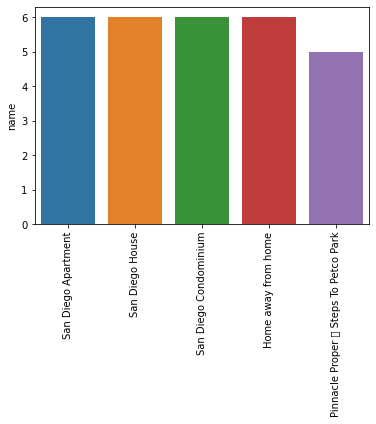

In [82]:
#Just, Plot this Data using CountPlot -
sns.barplot(x = listings_data['name'].value_counts().head().index,
           y = listings_data['name'].value_counts().head())

plt.xticks(rotation = 90)
plt.show()

In [83]:
#Let’s Replace the null values in the "name" column 
listings_data['name'].fillna(value = 'Home away from home', axis = 'index', inplace = True)

In [84]:
#Now, Cross-Check the Null Values -
listings_data['name'].isnull().sum()

#Now, We can see, We've successfully 'impute'/'substitute' our "Category Data" with "Mode" Value.

0

#### Handling the null values in the 'monthly_price' column, we could observe  that the datatype is object. Generally price values should be int or float. So we need to solve this issue.

In [85]:
listings_data['monthly_price'].dtype

dtype('O')

In [86]:
#Let's Check the Unique Values -
listings_data['monthly_price'].unique()

array([nan, '$2,150.00', '$2,500.00', '$1,450.00', '$5,500.00',
       '$1,050.00', '$1,100.00', '$1,895.00', '$2,400.00', '$3,000.00',
       '$1,800.00', '$2,900.00', '$1,999.00', '$1,150.00', '$2,200.00',
       '$1,200.00', '$800.00', '$1,650.00', '$885.00', '$5,000.00',
       '$3,190.00', '$5,300.00', '$2,800.00', '$1,872.00', '$4,200.00',
       '$1,599.00', '$1,700.00', '$550.00', '$1,960.00', '$2,210.00',
       '$1,699.00', '$1,799.00', '$1,899.00', '$1,950.00', '$1,500.00',
       '$2,195.00', '$1,260.00', '$1,249.00', '$3,100.00', '$3,400.00',
       '$2,450.00', '$6,000.00', '$1,000.00', '$2,975.00', '$700.00',
       '$2,100.00', '$1,400.00', '$8,000.00', '$2,225.00', '$8,090.00',
       '$3,200.00', '$1,795.00', '$1,995.00', '$950.00', '$3,500.00',
       '$2,499.00', '$4,000.00', '$2,300.00', '$3,300.00', '$5,900.00',
       '$4,500.00', '$1,399.00', '$3,800.00', '$685.00', '$60,000.00',
       '$4,350.00', '$5,710.00', '$2,099.00', '$1,695.00', '$3,900.00',
       '$1,

In [87]:
# Checking the Null Values -

print("{}: {} missing values".format('monthlyprice', listings_data['monthly_price'].isnull().sum()))
print("{}: {} % ".format('Mean of missing values', (np.round(listings_data['monthly_price'].isnull().mean(),4)*100)))

monthlyprice: 10879 missing values
Mean of missing values: 91.25 % 


In [88]:
listings_data['monthly_price'].fillna(value = '0', inplace = True)

In [89]:
print("{}: {} missing values".format('monthlyprice', listings_data['monthly_price'].isnull().sum()))

monthlyprice: 0 missing values


In [90]:
#Check "unique()" Values -

listings_data['monthly_price'].unique()

# Here, we can see that there are lot of unwanted symbols ('$'', ','). 

array(['0', '$2,150.00', '$2,500.00', '$1,450.00', '$5,500.00',
       '$1,050.00', '$1,100.00', '$1,895.00', '$2,400.00', '$3,000.00',
       '$1,800.00', '$2,900.00', '$1,999.00', '$1,150.00', '$2,200.00',
       '$1,200.00', '$800.00', '$1,650.00', '$885.00', '$5,000.00',
       '$3,190.00', '$5,300.00', '$2,800.00', '$1,872.00', '$4,200.00',
       '$1,599.00', '$1,700.00', '$550.00', '$1,960.00', '$2,210.00',
       '$1,699.00', '$1,799.00', '$1,899.00', '$1,950.00', '$1,500.00',
       '$2,195.00', '$1,260.00', '$1,249.00', '$3,100.00', '$3,400.00',
       '$2,450.00', '$6,000.00', '$1,000.00', '$2,975.00', '$700.00',
       '$2,100.00', '$1,400.00', '$8,000.00', '$2,225.00', '$8,090.00',
       '$3,200.00', '$1,795.00', '$1,995.00', '$950.00', '$3,500.00',
       '$2,499.00', '$4,000.00', '$2,300.00', '$3,300.00', '$5,900.00',
       '$4,500.00', '$1,399.00', '$3,800.00', '$685.00', '$60,000.00',
       '$4,350.00', '$5,710.00', '$2,099.00', '$1,695.00', '$3,900.00',
       '$1,

In [93]:
#Pre-processing this data to remove unwanted symbols

def data_preprocessing(x):
    x = x.replace('$','').strip()
    x =  x.replace(',','')
    return x.replace('nan', '0')

In [94]:
#Applying the Function 
listings_data['monthly_price'] = listings_data['monthly_price'].apply(data_preprocessing)

In [95]:
# Changing the datatype from object to float
listings_data['monthly_price'] = listings_data['monthly_price'].astype(float)

In [96]:
listings_data['monthly_price'].dtype

dtype('float64')

In [97]:
#Changing the datatype from float to int
listings_data['monthly_price'] = listings_data['monthly_price'].astype('int64')

In [98]:
listings_data['monthly_price'].dtype

dtype('int64')

In [99]:
#Check "unique()" Values -
listings_data['monthly_price'].unique()

array([    0,  2150,  2500,  1450,  5500,  1050,  1100,  1895,  2400,
        3000,  1800,  2900,  1999,  1150,  2200,  1200,   800,  1650,
         885,  5000,  3190,  5300,  2800,  1872,  4200,  1599,  1700,
         550,  1960,  2210,  1699,  1799,  1899,  1950,  1500,  2195,
        1260,  1249,  3100,  3400,  2450,  6000,  1000,  2975,   700,
        2100,  1400,  8000,  2225,  8090,  3200,  1795,  1995,   950,
        3500,  2499,  4000,  2300,  3300,  5900,  4500,  1399,  3800,
         685, 60000,  4350,  5710,  2099,  1695,  3900,  1420,  2249,
        1176,  3699,  1550,   952,  2000,  2250,  2700,  3195,  3038,
         837,  1300,  1250,  1750,  7500,  1722,  3750,  3600,  4495,
        1395,   500,  2650,  4334,  1350,  2899,  1575, 11000,  8500,
        1600, 10200,  4935,   725,  3995,  7200,  4720,  2495,  2355,
        8600,  6945,   966,  6895,  3024,  1239,  1398,  3850,  2205,
       20000,  3889,  2940,  6200,  3198,  2970,  1900, 10900,  2950,
        4056,   840,

#### Handling the null values in the 'host_name' column, 0.05% missing values are there. Since it is a categorical variable, we can impute null values with mode.

In [100]:
#Checking the Null/Missing Values -
print("{} : {}% missing values".format('host_name', np.round(listings_data['host_name'].isnull().mean(),4)*100))

host_name : 0.05% missing values


In [101]:
print("{} : {} missing values".format('host_name', listings_data['host_name'].isnull().sum()))

host_name : 6 missing values


In [102]:
#Computing the "Mode" of this Feature 

listings_data['host_name'].mode()

0    SeaBreeze
dtype: object

In [103]:
#Checking the Occurence of the Data 

listings_data['host_name'].value_counts()

SeaBreeze            161
710 Beach Rentals    133
John                 111
Michael              101
Sonder                96
                    ... 
Lindsay L.             1
Stuart                 1
Noelia                 1
Chrystal               1
Julian                 1
Name: host_name, Length: 2980, dtype: int64

In [104]:
#Substituting/Inputing the Null/Missing Data 

listings_data['host_name'].fillna(value = 'SeaBreeze', axis = 'index', inplace = True)

In [105]:
print("{} : {} missing values".format('host_name', listings_data['host_name'].isnull().sum()))

host_name : 0 missing values


In [106]:
#Correcting the Name of Common Column - 
listings_data.rename(columns={'id':'listing_id'}, inplace=True)
listings_data.columns

Index(['listing_id', 'name', 'host_id', 'host_name', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'city',
       'amenities', 'monthly_price', 'property_type'],
      dtype='object')

#### Pre Processing Reviews Data

In [107]:
reviews_data.shape

(344404, 6)

In [108]:
listings_data.shape

(11922, 19)

In [109]:
#Accesing required Columns from Original DataFrame - From "Listing" DataFrame:
df_1 = listings_data[['listing_id', 'name', 'city', 'property_type']]
df_1

listing_id                                            name  \
0               6  Large Craftsmen w/ yard ~ Perfect for families   
1            5570                   Ocean front condo on the sand   
2            8095                            Sunset Cliffs Studio   
3           39516                 Art Studio Retreat/Rustic Cabin   
4           45429                 OB cottage SD--view on waterway   
...           ...                                             ...   
11917    30046180  Fully Furnished Private Room with Private Bath   
11918    30047177      Your home away from home for Thanksgiving!   
11919    30048505                        Clean\nBright and Simple   
11920    30048809                    Cozy pillow top air mattress   
11921    30049974                                    Cozy bedroom   

              city property_type  
0        San Diego         House  
1        San Diego   Condominium  
2        San Diego    Guesthouse  
3        San Diego    Tiny house  
4        San Diego         House  
...            ...           ...  
11917    San Diego     Apartment  
11918    San Diego   Condominium  
11919  Chula Vista         House  
11920  Chula Vista         House  
11921    San Diego   Condominium  

[11922 rows x 4 columns]

In [110]:
df_1.drop_duplicates(inplace = True)
df_1 = df_1.set_index('listing_id')
df_1

name         city  \
listing_id                                                                
6           Large Craftsmen w/ yard ~ Perfect for families    San Diego   
5570                         Ocean front condo on the sand    San Diego   
8095                                  Sunset Cliffs Studio    San Diego   
39516                      Art Studio Retreat/Rustic Cabin    San Diego   
45429                      OB cottage SD--view on waterway    San Diego   
...                                                    ...          ...   
30046180    Fully Furnished Private Room with Private Bath    San Diego   
30047177        Your home away from home for Thanksgiving!    San Diego   
30048505                          Clean\nBright and Simple  Chula Vista   
30048809                      Cozy pillow top air mattress  Chula Vista   
30049974                                      Cozy bedroom    San Diego   

           property_type  
listing_id                
6                  House  
5570         Condominium  
8095          Guesthouse  
39516         Tiny house  
45429              House  
...                  ...  
30046180       Apartment  
30047177     Condominium  
30048505           House  
30048809           House  
30049974     Condominium  

[11922 rows x 3 columns]

In [111]:
#Accesing required Columns from Original DataFrame - From "Reviews" DataFrame:
df_2 = reviews_data[['listing_id', 'comments']]
df_2

listing_id                                           comments
0                6  Sara is an awesome hostess.  She was very cons...
1                6  My stay at “Craftsmen” was wonderful!  Sara wa...
2                6  This was my first time using Airbnb and Sara m...
3                6  Sara was a very pleasant host! Reservation was...
4                6  Sara was such an amazing hostess! My girlfrien...
...            ...                                                ...
344399    29881418  Vovi’s place is in an amazing location for vis...
344400    29891089  Ultra modern home but still had a homey, welco...
344401    29899812  She is really welcoming and kind, and I love h...
344402    29927527  The host canceled this reservation 5 days befo...
344403    29980961  The host canceled this reservation 7 days befo...

[344404 rows x 2 columns]

In [112]:
df_2.drop_duplicates('listing_id', keep='last', inplace=True)
df_2 = df_2.set_index('listing_id')
df_2

comments
listing_id                                                   
6           Very comfortable house!  Clean and nicely appo...
8095        The location and unit where exactly described ...
39516                  A beautiful and cozy backyard retreat.
45429       A charming little place near just about everyt...
54001       We felt like home here! Marsha is the perfect ...
...                                                       ...
29881418    Vovi’s place is in an amazing location for vis...
29891089    Ultra modern home but still had a homey, welco...
29899812    She is really welcoming and kind, and I love h...
29927527    The host canceled this reservation 5 days befo...
29980961    The host canceled this reservation 7 days befo...

[9759 rows x 1 columns]

In [113]:
#Now, Let's 'join' these 2 DataFrames

df_Join = df_1.join(df_2, on = 'listing_id', how = 'inner').dropna()
df_Join.reset_index(inplace=True)
df_Join

listing_id                                               name  \
0              6     Large Craftsmen w/ yard ~ Perfect for families   
1           8095                               Sunset Cliffs Studio   
2          39516                    Art Studio Retreat/Rustic Cabin   
3          45429                    OB cottage SD--view on waterway   
4          54001         La Jolla Peaceful: Sitting Room, Breakfast   
...          ...                                                ...   
9742    29881418           Historic Downtown Studio Private Parking   
9743    29891089  40% OFF Bright ☼ Upscale 3X3! Big Parties Welc...   
9744    29899812     2 Level Condo w/Fireplace-close to everything!   
9745    29927527                        San Diego Home with a View!   
9746    29980961                   Peaceful, Private Home with pool   

             city property_type  \
0       San Diego         House   
1       San Diego    Guesthouse   
2       San Diego    Tiny house   
3       San Diego         House   
4        La Jolla         House   
...           ...           ...   
9742    San Diego     Apartment   
9743    San Diego     Townhouse   
9744    San Diego   Condominium   
9745    San Diego     Apartment   
9746  Chula Vista         House   

                                               comments  
0     Very comfortable house!  Clean and nicely appo...  
1     The location and unit where exactly described ...  
2                A beautiful and cozy backyard retreat.  
3     A charming little place near just about everyt...  
4     We felt like home here! Marsha is the perfect ...  
...                                                 ...  
9742  Vovi’s place is in an amazing location for vis...  
9743  Ultra modern home but still had a homey, welco...  
9744  She is really welcoming and kind, and I love h...  
9745  The host canceled this reservation 5 days befo...  
9746  The host canceled this reservation 7 days befo...  

[9747 rows x 5 columns]

In [114]:
#Checking the Null Values 
df_Join.isnull().sum()

listing_id       0
name             0
city             0
property_type    0
comments         0
dtype: int64

In [115]:
 # Analyzing "Reviews/Comments" of the Customers.
df_Join['comments']

0       Very comfortable house!  Clean and nicely appo...
1       The location and unit where exactly described ...
2                  A beautiful and cozy backyard retreat.
3       A charming little place near just about everyt...
4       We felt like home here! Marsha is the perfect ...
                              ...                        
9742    Vovi’s place is in an amazing location for vis...
9743    Ultra modern home but still had a homey, welco...
9744    She is really welcoming and kind, and I love h...
9745    The host canceled this reservation 5 days befo...
9746    The host canceled this reservation 7 days befo...
Name: comments, Length: 9747, dtype: object

In [116]:
#Checking for some Random Data -   
df_Join['comments'][0]

'Very comfortable house!  Clean and nicely appointed.  Very responsive host.  Great location!'

In [117]:
#Checking for some Random Data -
df_Join['comments'][16]

'The house is adorable!  Parking was right outside the house and was available every time we needed it.  Its is very close to PB and to ocean views.  The room was clean and spacious.  The backyard is beautiful and tranquil. It was a very enjoyable stay.  We would definitely book again. :)'

#### Text Pre-Processsing 

In [118]:
#Text Pre-processing -
df_Join['comments'] = df_Join['comments'].str.lower()
df_Join['comments']

0       very comfortable house!  clean and nicely appo...
1       the location and unit where exactly described ...
2                  a beautiful and cozy backyard retreat.
3       a charming little place near just about everyt...
4       we felt like home here! marsha is the perfect ...
                              ...                        
9742    vovi’s place is in an amazing location for vis...
9743    ultra modern home but still had a homey, welco...
9744    she is really welcoming and kind, and i love h...
9745    the host canceled this reservation 5 days befo...
9746    the host canceled this reservation 7 days befo...
Name: comments, Length: 9747, dtype: object

In [119]:
#Cross-checking:
df_Join['comments'][16]

'the house is adorable!  parking was right outside the house and was available every time we needed it.  its is very close to pb and to ocean views.  the room was clean and spacious.  the backyard is beautiful and tranquil. it was a very enjoyable stay.  we would definitely book again. :)'

In [120]:
#Importing Punctuations -
import string    
punctuations = string.punctuation
punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [121]:
def remove_punc(reviews):
    new_List = [char for char in reviews if char not in punctuations]
    
    cleaned_Comments = ''
    
    for word in new_List:
        cleaned_Comments = cleaned_Comments + word
    return cleaned_Comments.strip()

In [122]:
df_Join['comments(Processed)'] = df_Join['comments'].apply(remove_punc)

In [123]:
df_Join.head()

listing_id                                            name       city  \
0           6  Large Craftsmen w/ yard ~ Perfect for families  San Diego   
1        8095                            Sunset Cliffs Studio  San Diego   
2       39516                 Art Studio Retreat/Rustic Cabin  San Diego   
3       45429                 OB cottage SD--view on waterway  San Diego   
4       54001      La Jolla Peaceful: Sitting Room, Breakfast   La Jolla   

  property_type                                           comments  \
0         House  very comfortable house!  clean and nicely appo...   
1    Guesthouse  the location and unit where exactly described ...   
2    Tiny house             a beautiful and cozy backyard retreat.   
3         House  a charming little place near just about everyt...   
4         House  we felt like home here! marsha is the perfect ...   

                                 comments(Processed)  
0  very comfortable house  clean and nicely appoi...  
1  the location and unit where exactly described ...  
2              a beautiful and cozy backyard retreat  
3  a charming little place near just about everyt...  
4  we felt like home here marsha is the perfect h...

In [124]:
#Checking the data -
df_Join['comments(Processed)'][16]

'the house is adorable  parking was right outside the house and was available every time we needed it  its is very close to pb and to ocean views  the room was clean and spacious  the backyard is beautiful and tranquil it was a very enjoyable stay  we would definitely book again'

In [125]:
#Checking the other data -

df_Join['comments(Processed)'][3]

#Now, We will still observe over here that We have some Extra/Repetating Data, which is exactly this "\n".
#It means, We have to preprocess this data further.

'a charming little place near just about everything in sd melissa made sure my arrival to her place was seamless and kept in touch via email telephone and text \n\nmelissas cottage is perfect for one or two people clean and everything you need is there \nif i had to describe her place and environment\nid say its a little rustic \n\nid stay here again without reservation'

In [126]:
#Let's 'Remove' that "\n" -
    
for i in range(len(df_Join['comments(Processed)'])):
    df_Join['comments(Processed)'][i] = df_Join['comments(Processed)'][i].replace('\n', '')

In [127]:
df_Join.head()

listing_id                                            name       city  \
0           6  Large Craftsmen w/ yard ~ Perfect for families  San Diego   
1        8095                            Sunset Cliffs Studio  San Diego   
2       39516                 Art Studio Retreat/Rustic Cabin  San Diego   
3       45429                 OB cottage SD--view on waterway  San Diego   
4       54001      La Jolla Peaceful: Sitting Room, Breakfast   La Jolla   

  property_type                                           comments  \
0         House  very comfortable house!  clean and nicely appo...   
1    Guesthouse  the location and unit where exactly described ...   
2    Tiny house             a beautiful and cozy backyard retreat.   
3         House  a charming little place near just about everyt...   
4         House  we felt like home here! marsha is the perfect ...   

                                 comments(Processed)  
0  very comfortable house  clean and nicely appoi...  
1  the location and unit where exactly described ...  
2              a beautiful and cozy backyard retreat  
3  a charming little place near just about everyt...  
4  we felt like home here marsha is the perfect h...

In [128]:
#Now, Processing the data further to create a WordCloud -
text_Comments = ' '.join(df_Join['comments(Processed)'])
text_Comments

'very comfortable house  clean and nicely appointed  very responsive host  great location the location and unit where exactly described and promised  quiet warm and cozy a great value  the kitchen was outfitted for cooking but with all the great restaurants in ob we never used it  the water was hot and entire place was very clean  we love the area and would most definitely stay at this location again a beautiful and cozy backyard retreat a charming little place near just about everything in sd melissa made sure my arrival to her place was seamless and kept in touch via email telephone and text melissas cottage is perfect for one or two people clean and everything you need is there if i had to describe her place and environmentid say its a little rustic id stay here again without reservation we felt like home here marsha is the perfect host a healthy organic breakfast is served every morning and you are free to use the whole house not just the room the garden is so cozy comfortable clea

In [129]:
#Checking the Length of our Text Data -
len(text_Comments)

2326720

#### Pre Processing Amenities Data

In [130]:
# Analyzing Most Common "Amenities" provided by the AirBnB's to their Customers.
listings_data['amenities']

0        {TV,Internet,Wifi,"Air conditioning",Kitchen,"...
1        {TV,"Cable TV",Internet,Wifi,Kitchen,"Free par...
2        {Internet,Wifi,Kitchen,"Free parking on premis...
3        {Internet,Wifi,Pool,Kitchen,"Pets live on this...
4        {TV,Internet,Wifi,Kitchen,"Free parking on pre...
                               ...                        
11917    {TV,"Cable TV",Internet,Wifi,"Air conditioning...
11918    {TV,Wifi,"Air conditioning",Kitchen,"Free park...
11919    {TV,Wifi,"Air conditioning",Pool,Kitchen,"Free...
11920    {TV,Wifi,"Air conditioning",Pool,Kitchen,"Free...
11921    {TV,Wifi,Kitchen,"Pets allowed",Heating,"Smoke...
Name: amenities, Length: 11922, dtype: object

In [131]:
listings_data['amenities'][0]

'{TV,Internet,Wifi,"Air conditioning",Kitchen,"Free parking on premises","Pets allowed","Free street parking",Heating,"Family/kid friendly",Washer,Dryer,"Smoke detector","Carbon monoxide detector","First aid kit","Fire extinguisher",Essentials,Shampoo,"24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Baby monitor","Outlet covers",Bathtub,"Changing table","High chair","Children’s books and toys","Babysitter recommendations",Crib,"Children’s dinnerware","Hot water","Luggage dropoff allowed",Other}'

In [132]:
#Now, Let's preprocess this data -
listings_data['amenities'][0].lower()

'{tv,internet,wifi,"air conditioning",kitchen,"free parking on premises","pets allowed","free street parking",heating,"family/kid friendly",washer,dryer,"smoke detector","carbon monoxide detector","first aid kit","fire extinguisher",essentials,shampoo,"24-hour check-in",hangers,"hair dryer",iron,"laptop friendly workspace","baby monitor","outlet covers",bathtub,"changing table","high chair","children’s books and toys","babysitter recommendations",crib,"children’s dinnerware","hot water","luggage dropoff allowed",other}'

In [133]:
#Now, Let's preprocess this data -
listings_data['amenities'] = listings_data['amenities'].str.lower()
listings_data['amenities']

0        {tv,internet,wifi,"air conditioning",kitchen,"...
1        {tv,"cable tv",internet,wifi,kitchen,"free par...
2        {internet,wifi,kitchen,"free parking on premis...
3        {internet,wifi,pool,kitchen,"pets live on this...
4        {tv,internet,wifi,kitchen,"free parking on pre...
                               ...                        
11917    {tv,"cable tv",internet,wifi,"air conditioning...
11918    {tv,wifi,"air conditioning",kitchen,"free park...
11919    {tv,wifi,"air conditioning",pool,kitchen,"free...
11920    {tv,wifi,"air conditioning",pool,kitchen,"free...
11921    {tv,wifi,kitchen,"pets allowed",heating,"smoke...
Name: amenities, Length: 11922, dtype: object

In [134]:
#Further preprocessing - 
def data_preprocessing(amenities):
    string = amenities.replace('{', '')
    string = string.replace('}', '')
    return string

In [135]:
#Checking the data -
data_preprocessing(listings_data['amenities'][1])

'tv,"cable tv",internet,wifi,kitchen,"free parking on premises",elevator,heating,"family/kid friendly",washer,dryer,"smoke detector",essentials,"hair dryer",iron,"laptop friendly workspace",microwave,"coffee maker",refrigerator,dishwasher,"dishes and silverware","cooking basics",oven,stove,"bbq grill","patio or balcony","long term stays allowed",waterfront,beachfront'

In [136]:
#Now, Let's Apply this "Function" - 
listings_data['amenities(Processed)'] = listings_data['amenities'].apply(data_preprocessing)
listings_data['amenities(Processed)']

0        tv,internet,wifi,"air conditioning",kitchen,"f...
1        tv,"cable tv",internet,wifi,kitchen,"free park...
2        internet,wifi,kitchen,"free parking on premise...
3        internet,wifi,pool,kitchen,"pets live on this ...
4        tv,internet,wifi,kitchen,"free parking on prem...
                               ...                        
11917    tv,"cable tv",internet,wifi,"air conditioning"...
11918    tv,wifi,"air conditioning",kitchen,"free parki...
11919    tv,wifi,"air conditioning",pool,kitchen,"free ...
11920    tv,wifi,"air conditioning",pool,kitchen,"free ...
11921    tv,wifi,kitchen,"pets allowed",heating,"smoke ...
Name: amenities(Processed), Length: 11922, dtype: object

In [137]:
#Checking the data -
listings_data['amenities(Processed)'][0]

'tv,internet,wifi,"air conditioning",kitchen,"free parking on premises","pets allowed","free street parking",heating,"family/kid friendly",washer,dryer,"smoke detector","carbon monoxide detector","first aid kit","fire extinguisher",essentials,shampoo,"24-hour check-in",hangers,"hair dryer",iron,"laptop friendly workspace","baby monitor","outlet covers",bathtub,"changing table","high chair","children’s books and toys","babysitter recommendations",crib,"children’s dinnerware","hot water","luggage dropoff allowed",other'

In [138]:
#Now, Let's preprocess this data further -
def data_preprocessing(amenities):
    string = amenities.split('''"''')
    return ''.join(string)

In [139]:
#Checking the data -
data_preprocessing(listings_data['amenities(Processed)'][1])

'tv,cable tv,internet,wifi,kitchen,free parking on premises,elevator,heating,family/kid friendly,washer,dryer,smoke detector,essentials,hair dryer,iron,laptop friendly workspace,microwave,coffee maker,refrigerator,dishwasher,dishes and silverware,cooking basics,oven,stove,bbq grill,patio or balcony,long term stays allowed,waterfront,beachfront'

In [140]:
#Now, Let's Apply this "Function" -
listings_data['amenities(Processed)'] = listings_data['amenities(Processed)'].apply(data_preprocessing)
listings_data['amenities(Processed)']

0        tv,internet,wifi,air conditioning,kitchen,free...
1        tv,cable tv,internet,wifi,kitchen,free parking...
2        internet,wifi,kitchen,free parking on premises...
3        internet,wifi,pool,kitchen,pets live on this p...
4        tv,internet,wifi,kitchen,free parking on premi...
                               ...                        
11917    tv,cable tv,internet,wifi,air conditioning,poo...
11918    tv,wifi,air conditioning,kitchen,free parking ...
11919    tv,wifi,air conditioning,pool,kitchen,free par...
11920    tv,wifi,air conditioning,pool,kitchen,free par...
11921    tv,wifi,kitchen,pets allowed,heating,smoke det...
Name: amenities(Processed), Length: 11922, dtype: object

In [141]:
#Now, Processing the data further to create a WordCloud -
text_Amenities = ', '.join(listings_data['amenities(Processed)'])
text_Amenities

'tv,internet,wifi,air conditioning,kitchen,free parking on premises,pets allowed,free street parking,heating,family/kid friendly,washer,dryer,smoke detector,carbon monoxide detector,first aid kit,fire extinguisher,essentials,shampoo,24-hour check-in,hangers,hair dryer,iron,laptop friendly workspace,baby monitor,outlet covers,bathtub,changing table,high chair,children’s books and toys,babysitter recommendations,crib,children’s dinnerware,hot water,luggage dropoff allowed,other, tv,cable tv,internet,wifi,kitchen,free parking on premises,elevator,heating,family/kid friendly,washer,dryer,smoke detector,essentials,hair dryer,iron,laptop friendly workspace,microwave,coffee maker,refrigerator,dishwasher,dishes and silverware,cooking basics,oven,stove,bbq grill,patio or balcony,long term stays allowed,waterfront,beachfront, internet,wifi,kitchen,free parking on premises,heating,essentials, internet,wifi,pool,kitchen,pets live on this property,dog(s),cat(s),free street parking,heating,family/ki

In [143]:
listings_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11922 entries, 0 to 11921
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   listing_id                      11922 non-null  int64  
 1   name                            11922 non-null  object 
 2   host_id                         11922 non-null  int64  
 3   host_name                       11922 non-null  object 
 4   neighbourhood                   11922 non-null  object 
 5   latitude                        11922 non-null  float64
 6   longitude                       11922 non-null  float64
 7   room_type                       11922 non-null  object 
 8   price                           11922 non-null  int64  
 9   minimum_nights                  11922 non-null  int64  
 10  number_of_reviews               11922 non-null  int64  
 11  last_review                     9762 non-null   object 
 12  reviews_per_month               

## Analysis regarding the Host 
* Who are Top Earners?
* Is there any Relationship between Monthly Earning and Prices?

In [144]:
listings_data.head()

listing_id                                            name  host_id  \
0           6  Large Craftsmen w/ yard ~ Perfect for families       29   
1        5570                   Ocean front condo on the sand     8435   
2        8095                            Sunset Cliffs Studio      270   
3       39516                 Art Studio Retreat/Rustic Cabin   169649   
4       45429                 OB cottage SD--view on waterway   197919   

                           host_name neighbourhood   latitude   longitude  \
0                               Sara   North Hills  32.753993 -117.129705   
1  Jef Karchin'S MISSIONBEACHRETREAT   Mission Bay  32.784304 -117.252578   
2                              Marin   Ocean Beach  32.735170 -117.243793   
3                    Chris  And Jean   North Hills  32.731884 -117.119180   
4                            Melissa   Loma Portal  32.748768 -117.229371   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt    295               2                149  2018-10-07   
1  Entire home/apt   2050               3                  0         NaN   
2  Entire home/apt     84               2                178  2015-11-02   
3  Entire home/apt     69               3                338  2018-11-07   
4  Entire home/apt    160               2                  6  2014-07-28   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               1.18                               1                20   
1                NaN                               2               328   
2               1.56                               1                 0   
3               3.33                               1               273   
4               0.06                               1               363   

        city                                          amenities  \
0  San Diego  {tv,internet,wifi,"air conditioning",kitchen,"...   
1  San Diego  {tv,"cable tv",internet,wifi,kitchen,"free par...   
2  San Diego  {internet,wifi,kitchen,"free parking on premis...   
3  San Diego  {internet,wifi,pool,kitchen,"pets live on this...   
4  San Diego  {tv,internet,wifi,kitchen,"free parking on pre...   

   monthly_price property_type  \
0              0         House   
1              0   Condominium   
2              0    Guesthouse   
3              0    Tiny house   
4              0         House   

                                amenities(Processed)  
0  tv,internet,wifi,air conditioning,kitchen,free...  
1  tv,cable tv,internet,wifi,kitchen,free parking...  
2  internet,wifi,kitchen,free parking on premises...  
3  internet,wifi,pool,kitchen,pets live on this p...  
4  tv,internet,wifi,kitchen,free parking on premi...

In [146]:
# Let's see who are the Top Earnering Hosts ?

top_earners_data = listings_data.groupby(['host_name'])['price'].mean().reset_index().sort_values(by='price', ascending=False)[0:20]
top_earners_data = df_data.round(decimals = 2)
top_earners_data

host_name    price
2409                Roxanne  3549.00
2620                   Stew  3142.00
816          Elite Lux Life  3026.54
887                  Faisel  2500.00
2852               Villaway  2425.00
1885              Maryellen  2300.00
2505                Shareef  2175.00
2921                Yasmine  2000.00
809        Elijah And Megan  1985.00
454                  Carrie  1848.46
113                  Amelia  1600.00
1689           Lisa And Tom  1500.00
2306             Red Awning  1484.00
271                  Beachy  1469.00
2670                  Tammi  1462.50
2717        Thomas & Corina  1430.00
2017  Monarch Luxury Villas  1426.07
1390            Juan Carlos  1400.00
2610       Sterling Resorts  1364.00
1757               Lysianne  1299.00

In [164]:
#Now, Let's Plot this Data for better understanding

fig = px.bar(top_earners_data, 
             x = top_earners_data['price'], 
             y = top_earners_data['host_name'],
             color = 'price',
             orientation= 'h',
             hover_data= [top_earners_data['host_name'],top_earners_data['price']],
            text = 'price',
            labels = {'host_name':'Name of the Hosts', 'price':'Average Earnings'})

fig.update_layout(template = 'simple_white', title_text = "Top 20 Earners by Host Names")
fig.show()

**Conclusion -**
- In the above Chart, we've listed/plotted ***Top 20 Earners by Host names***, one after the other.
- From the above visual, We can say that **"Roxanne"** is the ***Top Earner*** followed by **"Stew"** and **"Elite Lux Life"**.

In [165]:
# Finding out if there is any relationship between Monthly Earning and Prices 

df_monthly_price_filter = listings_data[listings_data['monthly_price']>0]
df_monthly_price_filter.rename(columns={'monthly_price':'monthly_earning'}, inplace=True)
df_monthly_price_filter.head()

listing_id                                             name  host_id  \
5        54001       La Jolla Peaceful: Sitting Room, Breakfast   252692   
6        62274               charming, colorful, close to beach   302986   
8        67441                        Canyon apartment hideaway   332552   
9        69385  Mission Beach, San Diego, CA  House with Garage   347408   
10       75668                         San Diego Living by JA 2   401936   

    host_name  neighbourhood   latitude   longitude        room_type  price  \
5      Marsha       La Jolla  32.811896 -117.269516     Private room    105   
6      Isabel  Pacific Beach  32.807337 -117.242432  Entire home/apt     68   
8       Peter   College Area  32.763648 -117.076749  Entire home/apt     90   
9    Kimberly    Mission Bay  32.786464 -117.254338  Entire home/apt    250   
10  Johnathon    North Hills  32.747304 -117.144234     Private room     50   

    minimum_nights  number_of_reviews last_review  reviews_per_month  \
5                2                174  2018-10-28               1.82   
6                2                460  2018-10-30               4.75   
8                3                  3  2015-07-13               0.07   
9                3                162  2018-10-29               1.72   
10               2                168  2018-10-28               1.89   

    calculated_host_listings_count  availability_365       city  \
5                                4               304   La Jolla   
6                                2               249  San Diego   
8                                5               285  San Diego   
9                                1               296  San Diego   
10                               2               204  San Diego   

                                            amenities  monthly_earning  \
5   {tv,"cable tv",wifi,kitchen,breakfast,"free st...             2150   
6   {wifi,"air conditioning","free parking on prem...             2500   
8   {tv,"cable tv",internet,wifi,"air conditioning...             1450   
9   {tv,"cable tv",internet,wifi,kitchen,"free par...             5500   
10  {tv,"cable tv",internet,wifi,"air conditioning...             1050   

   property_type                               amenities(Processed)  
5          House  tv,cable tv,wifi,kitchen,breakfast,free street...  
6     Guesthouse  wifi,air conditioning,free parking on premises...  
8      Apartment  tv,cable tv,internet,wifi,air conditioning,kit...  
9          House  tv,cable tv,internet,wifi,kitchen,free parking...  
10   Condominium  tv,cable tv,internet,wifi,air conditioning,kit...

In [170]:
#Now,Let's Plot this Data 
fig = px.scatter(df_monthly_price_filter,
           y='price',
           x='monthly_earning',
          color='price',
          size = 'price')

fig.update_layout(template = 'simple_white', title_text = "Monthly Earning VS Price")
fig.show()

**Conclusion -**
- From this, you can come up with Various Conclusions like -
- Bigger the Bubble, higher the Price is... Similarly, Smaller the Bubble, lesser the Price is...
- As the **"Price"** increases, we can see that **"Monthly Earning"** decreases. This might be happened because Most of the Guests prefer Affordable/Budget-Friendly Rooms and We can also confirm the same from above plot Dense Area (High density). 
- Moreover, We can also say that, Some Rooms made great Fortune which are having ***Meager Price (I.e. '195')***, has ***Monthly Earning of "60K"***. 
- On the other hand, the ***Expensive Rooms*** which are having ***More Price***, We can say that, those ***doesn't make Much Earnings***. Same we can see, For ***Price "1545", "1430", "1295", and "1200"***, the ***Monthly Earnings*** were **"9579", "20K", "8500", and "5000"** respectively. This was again happened because Most of the Guests prefer Affordable/Budget-Friendly Rooms.
- So, that's a **Conclusion** you can drawn from this **Scatter Plot**.

In [171]:
# Price comparison in terms of "property_type" and "room_type".
data = listings_data.groupby(['room_type','property_type'])['price'].agg('mean').to_frame()
data.sort_values(by='price', ascending=False)

price
room_type       property_type                             
Entire home/apt Villa                          1281.794872
                Castle                          944.000000
                Hotel                           799.000000
                Boat                            584.195652
Private room    Castle                          462.000000
...                                                    ...
Shared room     Hostel                           43.720930
                Bed and breakfast                34.714286
                Bungalow                         24.000000
Private room    Tent                             14.000000
                Shepherd's hut (U.K., France)    10.000000

[70 rows x 1 columns]

In [172]:
# Price comparison in terms of "property_type" and "room_type".
data_df = listings_data.groupby(['room_type','property_type'], as_index=False)['price'].agg('mean')
data_df.sort_values(by='price', ascending=False, inplace=True)
data_df.head()

room_type property_type        price
27  Entire home/apt         Villa  1281.794872
9   Entire home/apt        Castle   944.000000
17  Entire home/apt         Hotel   799.000000
3   Entire home/apt          Boat   584.195652
38     Private room        Castle   462.000000

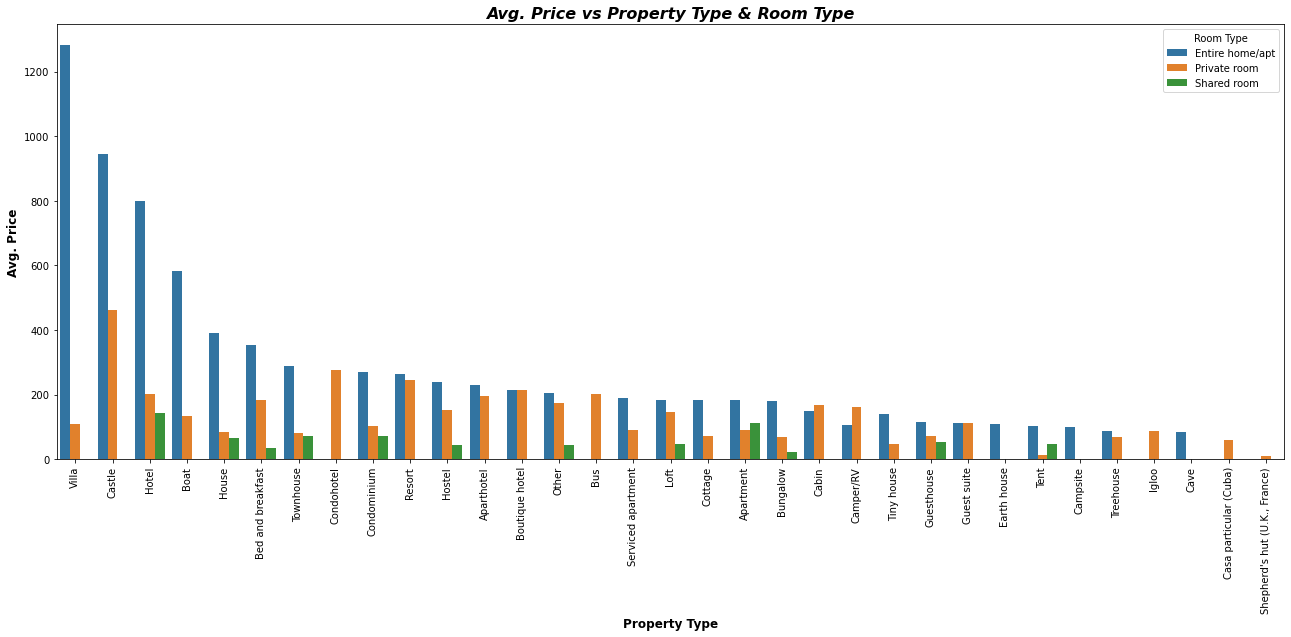

In [174]:
#Now,Let's Plot this Data 
plt.figure(figsize=(22,8))
sns.barplot(data= data_df, x = 'property_type', y = 'price', hue = 'room_type')
plt.xticks(rotation = 90)
plt.title('Avg. Price vs Property Type & Room Type', fontsize=16, fontweight='bold', fontstyle='italic')
plt.xlabel('Property Type', fontsize=12, fontweight='bold')
plt.ylabel('Avg. Price', fontsize=12, fontweight='bold')
plt.legend(title = 'Room Type', loc='upper right')
plt.show()

**Conclusion -**
- From this **"Bar Plot"**, We can say, the **"Villa", "Castle", "Hotel", "Boat", "House"**, etc. These are the ***Most Expensive "Property Types"*** in terms of **"Entire Home/Apt."**.
- Next, In terms of **"Private Room"**, **"Castle", "Condohotel", "Resort", "Boutique Hotel", "Hotel"**, etc. are the ***Most Expensive "Property Types"***.
- Similarly, In terms of **"Shared Room"**, We can see that **"Hotel", "Apartment", "Condominium", "Town House", "House"**, etc. are the ***Most Expensive "Property Types"***.

### Most Preferred "Property Type" and "Room Type" by Guests - OR
### To know which Property Type / Room Type got more Number of Bookings:

In [175]:
# Preference of Guests w.r.t. Property Type 
df = listings_data['property_type'].value_counts()
df = df.reset_index()#(inplace=True)
df.columns = ['Property_Type', 'Count']
df.head()

Property_Type  Count
0         House   4159
1     Apartment   3333
2   Condominium   1671
3     Townhouse    665
4    Guesthouse    388

In [176]:
#Now, Let's Plot this Data -
fig = px.treemap(df, path = ['Property_Type', 'Count'],
                 values = 'Count', 
                 color='Count', 
                 title='Preference of Guests w.r.t. Property Type')

fig.show()

**Conclusion -**
- This beautiful **"TreeMap"** displays/shows the Most Preferred 'Property Type' by Guests.
- To conclude this Chart, We can say, **"House", "Apartment", "Condominium"** these are the **'Top 3' Most Preferred Property Types** by the **Guests**.
- From All these Guests Room Preference, We can observe the one thing that ***Mostly Guests*** prefer **"Moderate Level Priced" Rooms** not Much Expensive, nor Much Less.

In [177]:
#Preference of Guests w.r.t. Room Type -
fig = px.pie(data_frame = listings_data, 
             names = listings_data['room_type'].value_counts().index, 
             values = listings_data['room_type'].value_counts(),
            title = 'Preference of Guests w.r.t. Room Type')

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

**Conclusion -**
- This beautiful **"Pie Chart"** displays/shows the Most Preferred 'Room Type' by Guests.
- To conclude this Chart, We can say, **"Entire home/apt"** was the First Choice/Most Preferred ***Room Type*** by approx. **'69.7%'** Guests followed by **"Private Room"** and **"Shared Room"** which are about **'28.7%' & '1.61%'** respectively.
    - From Overall distribution, We can say, **"Shared Room"** has ***much Less Preferred by the Guests***. This might because of there is a likelihood/possiblity like Most of the Guests Not prefer to Stay in Shared Room because they don't want to lose the Privacy there / as there is lack of Privacy and got disturbances by others.

### Most Preferred "Property Type" and "Room Type" by Guests -

In [178]:
listings_data.columns

Index(['listing_id', 'name', 'host_id', 'host_name', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'city',
       'amenities', 'monthly_price', 'property_type', 'amenities(Processed)'],
      dtype='object')

In [179]:
# Most Preferred "Property Type" and "Room Type" by Guests - Using "Sunburst" Chart:
new_data = listings_data.groupby(['property_type', 'room_type', 'price'], as_index=False)['id'].agg('count').sort_values(by='id', ascending=False)
new_data.rename(columns = {'id':'count'}, inplace=True)
new_data

KeyError: 'Column not found: id'

In [158]:
listings_data['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [159]:
#Now, Let's Plot this Data -
fig = px.sunburst(data_frame = new_data, 
                  path = ['room_type', 'property_type'], 
                  values = 'count',
                 color = 'room_type',
                 color_discrete_map = {'Entire home/apt':'#FF97FF', 'Private room':'#FF6692', 'Shared room':'#AB63FA'}, 
                  title = "Most Preferred 'Property Type' and 'Room Type' by Guests")

fig.show()

**Conclusion -**
- This beautiful **"Sunburst" Chart** displays/shows the Most Preferred 'Property Type' and 'Room Type' by Guests.
- To conclude this Chart, We can say, **"Entire home/apt"** was the First Choice/Most Preferred ***Room Type*** followed by **"Private Room"** and **"Shared Room"**.
    - From Overall distribution, We can say, **"Shared Room"** has ***much Less Preferred by the Guests***. This might because of there is a likelihood/possiblity like Most of the Guests Not prefer to Stay in Shared Room because they don't want to lose the Privacy there / as there is lack of Privacy and got disturbances by others.
- Now, In terms of **"Entire home/apt"** Room Type, We can see, **"House", "Apartment", "Condominium"** these are the **'Top 3' Most Preferred Room Types** by the **Guests**.
- Then, In case of **"Private Room"**, again we can see, **"House", "Apartment", "Condominium"** these are the **'Top 3' Most Preferred Room Types** by the **Guests**.
- However, In case of **"Shared Room"**, We can see that, **"Apartment", "House", "Hotel", "Condominium"** these are the **Top Most Preferred Room Types** by the **Guests**.
- From All these Guests Room Preference, We can observe the one thing that ***Mostly Guests*** prefer **"Moderate Level Priced" Rooms** not Much Expensive, nor Much Less.

### Find-out All the Affordable/Budgeted AirBnB 

In [160]:
data = listings_data.copy()
data.head()

id                                            name  host_id  \
0      6  Large Craftsmen w/ yard ~ Perfect for families       29   
1   5570                   Ocean front condo on the sand     8435   
2   8095                            Sunset Cliffs Studio      270   
3  39516                 Art Studio Retreat/Rustic Cabin   169649   
4  45429                 OB cottage SD--view on waterway   197919   

                           host_name neighbourhood   latitude   longitude  \
0                               Sara   North Hills  32.753993 -117.129705   
1  Jef Karchin'S MISSIONBEACHRETREAT   Mission Bay  32.784304 -117.252578   
2                              Marin   Ocean Beach  32.735170 -117.243793   
3                    Chris  And Jean   North Hills  32.731884 -117.119180   
4                            Melissa   Loma Portal  32.748768 -117.229371   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt    295               2                149  2018-10-07   
1  Entire home/apt   2050               3                  0         NaN   
2  Entire home/apt     84               2                178  2015-11-02   
3  Entire home/apt     69               3                338  2018-11-07   
4  Entire home/apt    160               2                  6  2014-07-28   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               1.18                               1                20   
1                NaN                               2               328   
2               1.56                               1                 0   
3               3.33                               1               273   
4               0.06                               1               363   

        city                                          amenities  \
0  San Diego  {TV,Internet,Wifi,"Air conditioning",Kitchen,"...   
1  San Diego  {TV,"Cable TV",Internet,Wifi,Kitchen,"Free par...   
2  San Diego  {Internet,Wifi,Kitchen,"Free parking on premis...   
3  San Diego  {Internet,Wifi,Pool,Kitchen,"Pets live on this...   
4  San Diego  {TV,Internet,Wifi,Kitchen,"Free parking on pre...   

   monthly_price property_type  
0              0         House  
1              0   Condominium  
2              0    Guesthouse  
3              0    Tiny house  
4              0         House

In [161]:
data.shape

(11922, 19)

In [162]:
#Q7. Find All the AirBnB's that are below 500 (Budget Hotels) as well as Affordable.
data = data[(data['price']<=500) & (data['price']>0)]
data.head()

id                                            name  host_id  \
0      6  Large Craftsmen w/ yard ~ Perfect for families       29   
2   8095                            Sunset Cliffs Studio      270   
3  39516                 Art Studio Retreat/Rustic Cabin   169649   
4  45429                 OB cottage SD--view on waterway   197919   
5  54001      La Jolla Peaceful: Sitting Room, Breakfast   252692   

         host_name neighbourhood   latitude   longitude        room_type  \
0             Sara   North Hills  32.753993 -117.129705  Entire home/apt   
2            Marin   Ocean Beach  32.735170 -117.243793  Entire home/apt   
3  Chris  And Jean   North Hills  32.731884 -117.119180  Entire home/apt   
4          Melissa   Loma Portal  32.748768 -117.229371  Entire home/apt   
5           Marsha      La Jolla  32.811896 -117.269516     Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    295               2                149  2018-10-07               1.18   
2     84               2                178  2015-11-02               1.56   
3     69               3                338  2018-11-07               3.33   
4    160               2                  6  2014-07-28               0.06   
5    105               2                174  2018-10-28               1.82   

   calculated_host_listings_count  availability_365       city  \
0                               1                20  San Diego   
2                               1                 0  San Diego   
3                               1               273  San Diego   
4                               1               363  San Diego   
5                               4               304   La Jolla   

                                           amenities  monthly_price  \
0  {TV,Internet,Wifi,"Air conditioning",Kitchen,"...              0   
2  {Internet,Wifi,Kitchen,"Free parking on premis...              0   
3  {Internet,Wifi,Pool,Kitchen,"Pets live on this...              0   
4  {TV,Internet,Wifi,Kitchen,"Free parking on pre...              0   
5  {TV,"Cable TV",Wifi,Kitchen,Breakfast,"Free st...           2150   

  property_type  
0         House  
2    Guesthouse  
3    Tiny house  
4         House  
5         House

In [163]:
#Cross-Checking the Data in 'price' -
data['price'].unique()

array([295,  84,  69, 160, 105,  68,  75,  90, 250,  50,  59, 125, 115,
       119, 209,  89, 178, 475, 221,  70,  79,  49,  55,  48,  65, 219,
       180, 145,  71, 390,  99, 175, 155,  95, 215, 495,  38,  85,  80,
       165, 500, 330,  60, 135, 235, 130, 149, 142, 167, 110,  86, 257,
       139, 275, 127,  35, 264, 400,  47, 109, 362, 300, 120, 210,  39,
        45, 239, 137, 126, 170, 199, 189, 200, 179, 225,  83, 290, 450,
       265, 150, 365, 197, 245,  67,  44,  36,  94, 195, 154,  40,  34,
       465,  64, 280,  92, 183,  66, 184, 185, 249, 129, 299,  54,  52,
        74, 385, 350, 138, 151, 298,  29,  32,  24,  46, 222, 331, 182,
       190, 118, 339,  58, 285, 140, 100, 470, 227, 325, 311, 259, 499,
        31, 425, 198, 360, 349,  97, 429, 128, 132,  42, 270, 216,  76,
       240,  93, 220, 375, 214, 394, 237, 238, 315,  73, 159, 289,  98,
       430, 395, 205, 279, 116,  88, 133, 156,  77, 342, 143,  28, 288,
       229, 108, 369, 399, 415, 448, 335, 370, 124, 480, 112, 10

In [164]:
data = data[['name','price']]
data

name  price
0      Large Craftsmen w/ yard ~ Perfect for families    295
2                                Sunset Cliffs Studio     84
3                     Art Studio Retreat/Rustic Cabin     69
4                     OB cottage SD--view on waterway    160
5          La Jolla Peaceful: Sitting Room, Breakfast    105
...                                               ...    ...
11917  Fully Furnished Private Room with Private Bath     70
11918      Your home away from home for Thanksgiving!    150
11919                        Clean\nBright and Simple     32
11920                    Cozy pillow top air mattress     32
11921                                    Cozy bedroom     55

[11091 rows x 2 columns]

In [180]:
#Let's Plot this Data -
fig = px.bar(data_frame = data, 
             y = data['name'][0:20], 
             x = data['price'][0:20], 
             color = data['price'][0:20], 
             text = data['price'][0:20], 
            labels = {'x':'Price', 'y':'AirBnB Names'})

fig.update_layout(template = 'simple_white', title_text = "Affordable/Budgeted AirBnB")
fig.show()

KeyError: 'name'

**Conclusion -**
- Now, We can Conclude that, We have **Total "11091" AirBnB's** which are the Affordable/Budgeted AirBnB's that are **below "500"**. It means, these are come under our "Budget Hotel" as well as they are "Affordable".
- From this above Visual, We can see the some of the ***Affordable/Budgeted AirBnB's*** along with their ***Names and Price***.

In [170]:
#Q8. Top 20 Cheapest AirBnB with Approx. Price -
data = data[['name', 'price']].sort_values(by = 'price').nsmallest(20, columns = 'price')
data

name  price
5566                     Crash and Dash Shared Dorm Room     10
7329         Zzzzz Wonderful Master Bedroom in Hillcrest     10
11372                                          mcdonalsa     10
11114                 Private Room in Canyon View House!     10
11885                         Personal tent in Hillcrest     10
6685          BEAUTIFULLY REFURNISHED! GOLDEN HILL HOUSE     10
11177                                Hillcrest - Tent :)     13
11411        Bamboo Bed - For travelers on short budget!     14
6493   Shared space w/FLmattress - 10' drive to Downt...     15
11070                                           Mi lugar     16
11776                        Tent in our groovy backyard     16
11422  Perfect Getaway | Tech Ready | Beer Central | ...     17
6528   Shared space w/FLmattress - 10' drive to Downt...     17
11336                             Comfy tent - Hillcrest     19
11773      HONEYMOONERS 2 MINILOFT FOR 3 CROSSING BORDER     19
11710                                      Unique Cabana     19
8655                                          Zebra Room     20
8656                                         Bamboo Room     20
6492    Shared space w/Qmattress - 10' drive to Downtown     20
3299                         Cozy Couch in Pacific Beach     20

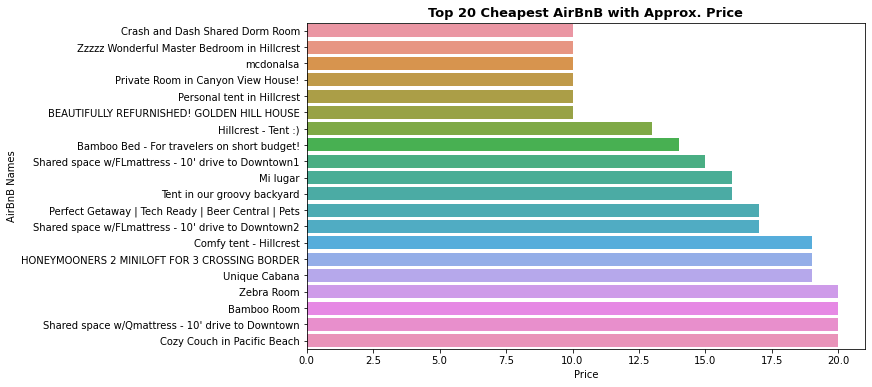

In [171]:
#Let's Plot this Data -
plt.figure(figsize=(10,6))
sns.barplot(y = 'name',
           x = 'price',
           data = data)

plt.xlabel('Price')
plt.ylabel('AirBnB Names')
plt.title('Top 20 Cheapest AirBnB with Approx. Price', fontsize = 13, fontweight = 'bold')

plt.show()

**Conclusion -**
- From this above Visual, We can see the our ***Top 20 Cheapest AirBnB with Approx. Price***.

In [173]:
#Q9. Most Expensive AirBnB's -

df_data = listings_data.groupby(['name', 'room_type'])['price'].mean().reset_index().sort_values(by='price', 
                                                                                               ascending=False)[0:20]
df_data

name        room_type  \
11558  Yacht - Leight Star`s interior layout sleeps u...  Entire home/apt   
8791   Private Weddings / Venue - Beachcliff Villas i...  Entire home/apt   
9437                                    Rosecrans Beauty  Entire home/apt   
384    180 View La Jolla Ocean Front 909 Coast28SDCA9...  Entire home/apt   
923                                4 bedroom 90 ft Yacht  Entire home/apt   
2168                           Birdrock Ocean View Elite  Entire home/apt   
10769                         TEST LISTING - DO NOT BOOK  Entire home/apt   
3984                             Crown Jewel of La Jolla  Entire home/apt   
5769                            La Jolla Luxury villa II  Entire home/apt   
10041                       Soledad Elite Scenic Mansion  Entire home/apt   
11347                      Villa Portifino Luxury Estate  Entire home/apt   
5832                           La Jolla Villa St Michele  Entire home/apt   
5806             La Jolla Shores Beachfront Luxury Villa  Entire home/apt   
911         4 Bedrooms plus Sauna, Jacuzzi, Bikes & More     Private room   
5785                                   La Jolla Pacifica  Entire home/apt   
4301   Downtown San Diego PENTHOUSE with PRIVATE Jacuzzi  Entire home/apt   
4681                             Forever Views San Diego  Entire home/apt   
10685                                    Sunset Villa II  Entire home/apt   
11348                                    Villa Portofino  Entire home/apt   
5602                   Jewel Elite Above La Jolla Shores  Entire home/apt   

         price  
11558  10000.0  
8791   10000.0  
9437    7000.0  
384     6000.0  
923     5500.0  
2168    5250.0  
10769   5000.0  
3984    5000.0  
5769    4150.0  
10041   3850.0  
11347   3550.0  
5832    3250.0  
5806    3142.0  
911     3000.0  
5785    3000.0  
4301    3000.0  
4681    3000.0  
10685   2900.0  
11348   2889.0  
5602    2850.0

In [174]:
#Now, Let's Plot this Data -
fig = px.bar(data_frame = df_data, 
             x = df_data['price'], 
             y = df_data['name'],
             color = 'price',
            text = 'price',
            labels = {'name':'Name of the AirBnB', 'price':'Avg. Price'})

fig.update_layout(template = 'plotly_dark', title_text = "Top 20 Most Expensive AirBnB's")
fig.show()

**Conclusion -**
- In the above Chart, we've listed/ploted ***Top 20 Most Expensive AirBnB's***, one after the other.
- From the above visual, We can say that **"Private Weddings / Venue - Beachcliff Villas", "Yacht - Leight Star's interior layout"** are the ***Most Expensive*** ones followed by **"Rosecrans Beauty"** and **"180 View La Jolla Ocean Front"**.
- On Top of that, We've also observed that Most of these/Almost All these ***Expensive*** ones has bookings for **"Entire home/apt"** as a ***Room Type***. Hence, It seems to be like Most of the guests prefer to Stay in **"Entire home/apt"** and AirBnB has More Earners from these kind of Room Types.

# @Regarding the Neighbourhood -
* Any particular Location getting Maximum Number of Bookings.
* Price relation with respect to Location.

In [175]:
#Q10. Any particular Location getting Maximum Number of Bookings.
listings_data['city'].unique()

array(['San Diego', 'La Jolla', 'La Jolla ', 'Del Mar', 'Solana Beach',
       'San Diego ', 'Chula Vista', 'Oceanside', 'University heights',
       'Ocean Beach', 'la jolla', 'Mission Beach', 'San diego',
       'La jolla', 'Lemon Grove', 'Ocean Beach, San Diego', 'LA JOLLA',
       'Coronado', 'Escondido', 'Chula Vista ', 'La Jolla, San Diego',
       'Alpine', 'La Mesa', 'SAN DIEGO', 'Del Mar Highlands ',
       'San Diego, CA, United States', 'San Diego, California, US',
       'سان دييغو', 'Pacific Beach', 'Chula Vista,', ' La Jolla',
       'La Jolla Shores', 'Mission Bay', 'Bonita', 'Newport Beach',
       'Santee', 'National City', 'Gas lamp San Diego', 'Pacific Beach ',
       'San DIego', 'CA', 'Chula Vista (Eastlake)', 'SanDiego',
       'Spring Valley', 'Tijuana', 'Sandiego', 'Imperial Beach'],
      dtype=object)

In [176]:
#Now, Let's preprocess this data -

def data_preprocessing(string):
    myList = [items for items in string.title()]
    
    str = ''
    for word in myList:
        str = str + word
    return str.strip()

In [177]:
listings_data['city(Pre-processed)'] = listings_data['city'].apply(data_preprocessing)

In [178]:
listings_data['city(Pre-processed)'].unique()

array(['San Diego', 'La Jolla', 'Del Mar', 'Solana Beach', 'Chula Vista',
       'Oceanside', 'University Heights', 'Ocean Beach', 'Mission Beach',
       'Lemon Grove', 'Ocean Beach, San Diego', 'Coronado', 'Escondido',
       'La Jolla, San Diego', 'Alpine', 'La Mesa', 'Del Mar Highlands',
       'San Diego, Ca, United States', 'San Diego, California, Us',
       'سان دييغو', 'Pacific Beach', 'Chula Vista,', 'La Jolla Shores',
       'Mission Bay', 'Bonita', 'Newport Beach', 'Santee',
       'National City', 'Gas Lamp San Diego', 'Ca',
       'Chula Vista (Eastlake)', 'Sandiego', 'Spring Valley', 'Tijuana',
       'Imperial Beach'], dtype=object)

In [179]:
listings_data.head()

id                                            name  host_id  \
0      6  Large Craftsmen w/ yard ~ Perfect for families       29   
1   5570                   Ocean front condo on the sand     8435   
2   8095                            Sunset Cliffs Studio      270   
3  39516                 Art Studio Retreat/Rustic Cabin   169649   
4  45429                 OB cottage SD--view on waterway   197919   

                           host_name neighbourhood   latitude   longitude  \
0                               Sara   North Hills  32.753993 -117.129705   
1  Jef Karchin'S MISSIONBEACHRETREAT   Mission Bay  32.784304 -117.252578   
2                              Marin   Ocean Beach  32.735170 -117.243793   
3                    Chris  And Jean   North Hills  32.731884 -117.119180   
4                            Melissa   Loma Portal  32.748768 -117.229371   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt    295               2                149  2018-10-07   
1  Entire home/apt   2050               3                  0         NaN   
2  Entire home/apt     84               2                178  2015-11-02   
3  Entire home/apt     69               3                338  2018-11-07   
4  Entire home/apt    160               2                  6  2014-07-28   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               1.18                               1                20   
1                NaN                               2               328   
2               1.56                               1                 0   
3               3.33                               1               273   
4               0.06                               1               363   

        city                                          amenities  \
0  San Diego  {TV,Internet,Wifi,"Air conditioning",Kitchen,"...   
1  San Diego  {TV,"Cable TV",Internet,Wifi,Kitchen,"Free par...   
2  San Diego  {Internet,Wifi,Kitchen,"Free parking on premis...   
3  San Diego  {Internet,Wifi,Pool,Kitchen,"Pets live on this...   
4  San Diego  {TV,Internet,Wifi,Kitchen,"Free parking on pre...   

   monthly_price property_type city(Pre-processed)  
0              0         House           San Diego  
1              0   Condominium           San Diego  
2              0    Guesthouse           San Diego  
3              0    Tiny house           San Diego  
4              0         House           San Diego

In [180]:
myDict = {
    'Ocean Beach, San Diego' : 'San Diego',
    'La Jolla, San Diego' : 'La Jolla',
    'San Diego, Ca, United States' : 'San Diego',
    'San Diego, California, Us' : 'San Diego',
    'سان دييغو' : 'San Diego',
    'La Jolla Shores' : 'San Diego',
    'Gas Lamp San Diego' : 'San Diego',
    'Ca' : 'CA',
    'Chula Vista (Eastlake)' : 'Chula Vista',
    'Chula Vista,' : 'Chula Vista',
    'Sandiego' : 'San Diego',
    'Del Mar Highlands' : 'Del Mar'
}

In [181]:
listings_data['city(Pre-processed)'].replace(myDict, inplace = True)

In [182]:
#Check the unique data -
listings_data['city(Pre-processed)'].unique()

array(['San Diego', 'La Jolla', 'Del Mar', 'Solana Beach', 'Chula Vista',
       'Oceanside', 'University Heights', 'Ocean Beach', 'Mission Beach',
       'Lemon Grove', 'Coronado', 'Escondido', 'Alpine', 'La Mesa',
       'Pacific Beach', 'Mission Bay', 'Bonita', 'Newport Beach',
       'Santee', 'National City', 'CA', 'Spring Valley', 'Tijuana',
       'Imperial Beach'], dtype=object)

In [183]:
#Checking the Number of Unique data -
listings_data['city(Pre-processed)'].nunique()

24

In [184]:
#Now, Come-back to our Problem Statement -
    #Q10. Any particular Location (Cities) getting Maximum Number of Bookings.
data = listings_data['city(Pre-processed)'].value_counts()[0:5]
data

San Diego      11204
La Jolla         299
Chula Vista      280
Del Mar           82
Tijuana            8
Name: city(Pre-processed), dtype: int64

In [185]:
#Now, Let's Plot this Data -
fig = px.pie(data_frame = data, 
             names = data.index, 
             values = data, 
             title = 'Top 5 Location (Cities) having Maximum Number of Bookings')

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

**Conclusion -**
- Above Pie Chart, shows ***Top 5 Cities*** who's having ***Maximum Number of Bookings***.
- To conclude above Chart, We can say, ***Most of the Bookings of around "94.4%"*** were takes place for **"San Diego" City** as ***lot of Tourist Attractions/Places (Neighbourhood)*** are there to ***Explore in the Vicinity of "San Diego"*** followed by **"La Jolla", "Chula Vista"** and so on...

In [186]:
#Q11. Any particular Location (neighbourhood) getting Maximum Number of Bookings.
df = listings_data['neighbourhood'].value_counts().nlargest(10)
df

Mission Bay        1458
Pacific Beach      1029
La Jolla            800
North Hills         703
East Village        681
Midtown             595
Ocean Beach         472
Loma Portal         320
Balboa Park         311
University City     272
Name: neighbourhood, dtype: int64

In [187]:
#Now, Let's plot this Data -
fig = px.pie(data_frame = df, 
             names = df.index, 
             values = df, 
             title = 'Top 10 Neighbourhood Locations w.r.t Maximum Number of Bookings')

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

**Conclusion -**
- This Pie Chart shows, ***Top 10 Neighbourhood Locations*** who's having ***Maximum Number of Bookings***. 
- To conclude above Chart, We can say, In terms of ***Neighbourhood Locations***, ***Most of the Bookings*** were takes place for **"Mission Bay"** of around **"22%"** followed by **"Pacific Beach", "La Jolla"** which has **"15.5%" & "12%"** respectively...

#### To know which particular Location (Neighbourhood) getting Maximum Number of Bookings.   

In [188]:
#Alternate Visual for: Q11. Any particular Location (neighbourhood) getting Maximum Number of Bookings.
listings_data["neighbourhood"].value_counts()

Mission Bay                    1458
Pacific Beach                  1029
La Jolla                        800
North Hills                     703
East Village                    681
                               ... 
Lincoln Park                      2
Horton Plaza                      2
Thomy Locust Pl                   1
Eastlake Woods                    1
Amphitheater And Water Park       1
Name: neighbourhood, Length: 103, dtype: int64

In [193]:
listings_data["neighbourhood"].describe()

count           11922
unique            103
top       Mission Bay
freq             1458
Name: neighbourhood, dtype: object

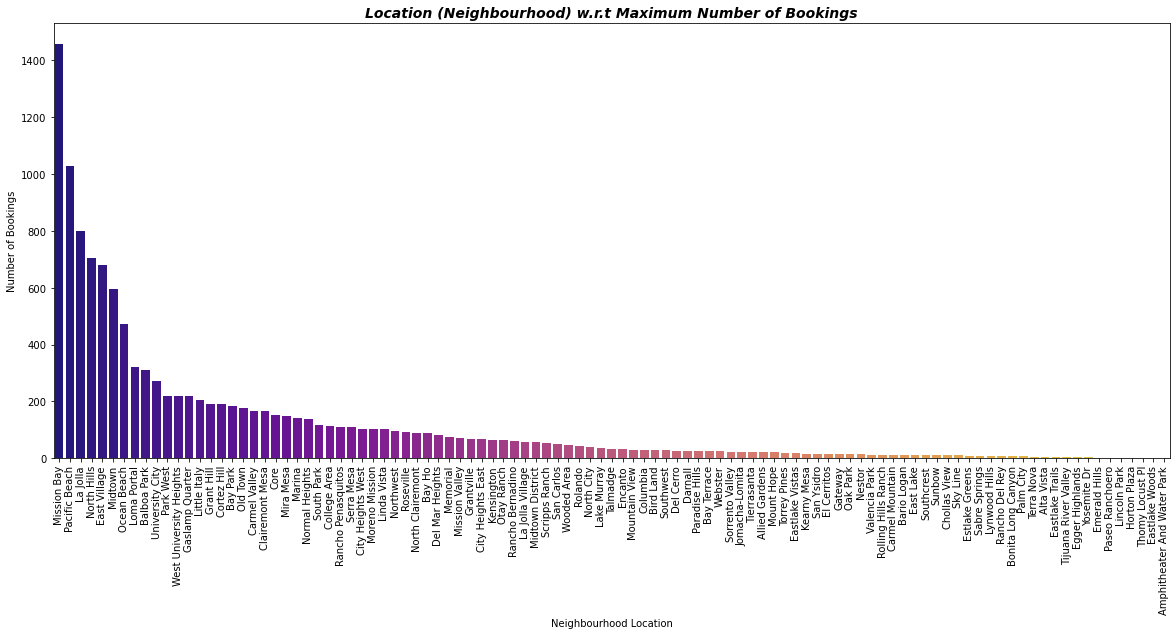

In [189]:
#Now, Let's Plot this Data - Using "Seaborn":
fig = plt.subplots(figsize = (20,8))
sns.set_style = "darkgrid"

sns.countplot(x = listings_data["neighbourhood"], order = listings_data["neighbourhood"].value_counts().index, palette = "plasma")

plt.xticks(rotation = 90)
plt.title("Location (Neighbourhood) w.r.t Maximum Number of Bookings", fontsize = 14, fontweight = 'bold', fontstyle = 
          'italic')
plt.xlabel('Neighbourhood Location')
plt.ylabel('Number of Bookings')

plt.show()

**Conclusion -**
- This Bar Chart shows, ***Neighbourhood Locations*** who's having ***Maximum Number of Bookings***. 
- To conclude above Chart, We can say, In terms of ***Neighbourhood Locations***, ***Most of the Bookings*** were taken place for **"Mission Bay"** of around **"22%"** followed by **"Pacific Beach", "La Jolla"** which has **"15.5%" & "12%"** respectively and so on...

# Regarding the Price -
* Price vs Location -

In [196]:
# Price relation with respect to Location - (Price vs Location)

df_relation = listings_data[['neighbourhood', 'price']].sort_values(by = 'price', ascending = False)
df_relation

neighbourhood  price
10915               Core  10000
10911        Ocean Beach  10000
9366           Roseville   7000
9041            La Jolla   6000
5864        East Village   5500
...                  ...    ...
6685         Balboa Park     10
7329             Midtown     10
11372  City Heights East     10
7046     Gaslamp Quarter      0
5919       Pacific Beach      0

[11922 rows x 2 columns]

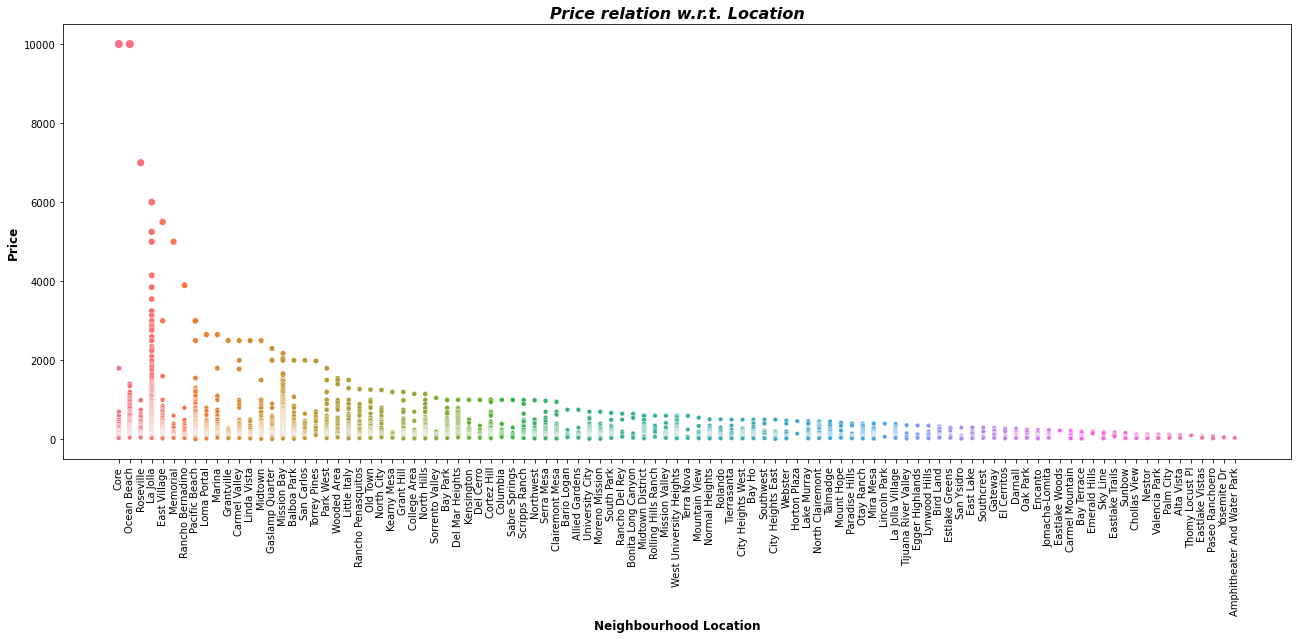

In [197]:
#Now, Let's Plot this Data -
plt.figure(figsize=(22,8))
sns.scatterplot(y = 'price', 
                x = 'neighbourhood', 
               hue = 'neighbourhood', 
               size = 'price',
               data = df_relation,
               legend = False)

plt.xticks(rotation = 'vertical')

plt.title('Price relation w.r.t. Location', fontsize = 16, fontweight = 'bold', fontstyle = 'italic')
plt.xlabel('Neighbourhood Location', fontsize = 12, fontweight = 'bold')
plt.ylabel('Price', fontsize = 12, fontweight = 'bold')
plt.show()

**Conclusion -**
- This is our beautiful Scatter Plot which depicts the Relationship between Price w.r.t. Location.
- From this Scatter Plot, It is clear that, some of the **AirBnB's** that are located at **"Core"** and **"Ocean Beach"**, were Super Expensive and at the same time, there are less Number of **AirBnB's** available if compare with **"Mission Bay", "Pacific Beach", "La Jolla", "North Hills", "East Village"** and **"Midtown"**. (If we compare it with our previous Visual)
- On the other hand, We can say, best Location (Neighbourhood) with lower Priced AirBnB has Most of the Bookings / Most preferred by the Guests.
- If we deep dive into this, We can clearly see that, As **"Mission Bay"** Location has Moderate Level Priced, Most of the guests preferred to Stay there. Next, If we see the **"Pacific Beach"** Location, Prices are slightly high compared to **"Mission Bay"**. Hence, less number of guests prefer to stay here than **"Mission Bay"**.
    - Similarly, **"La Jolla"** Location, seems to be Expensive compared to **"Mission Bay"** & **"Pacific Beach"**. Therefore, the Number to bookings were lesser than these 2 Locations.
- So, To conclude this, We can say, ***Most of the guest prefer*** to have ***bookings for "best Locations (Neighbourhood)"*** and at the same time, **"Moderate level Priced" AirBnB's**.

# @Regarding the Reviews -

In [224]:
#Now, Let's create our "WordCload" -
from wordcloud import WordCloud

In [228]:
#Create an Object of stopwords -
import nltk
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

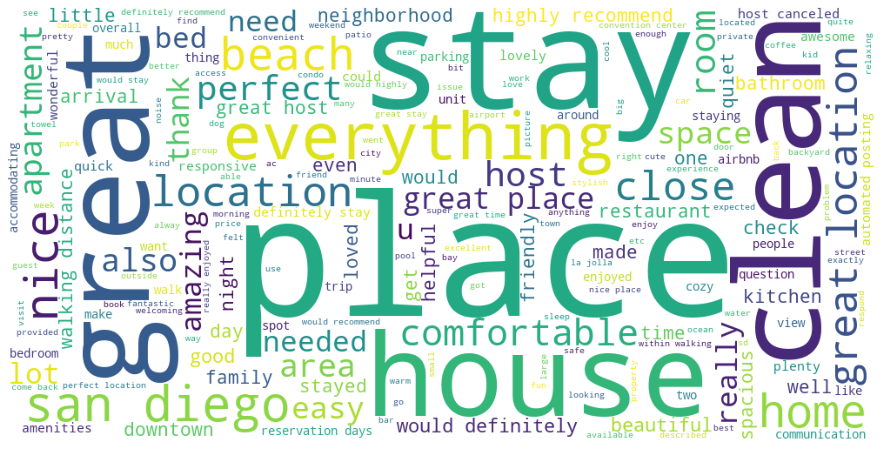

In [229]:
#Now, Create our "WordCload" -
wordcloud = WordCloud(width = 1000, height = 500, stopwords = stop, background_color = 'white').generate(text_Comments)
plt.figure(figsize = (25, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Conclusion -**
- Now, This is a beautiful **"WordCloud"** of which we were talking about.
- From this **"WordCloud"**, We can definitely come-up with some ***Conclusion*** like - These are ***exactly the "Reviews/Comments" of the Customers***.
    - It means, Our **"Customers"** are going to prefer All these **"KeyWords"** such as - **"great", "place", "clean", "stay", "house", "great location", "comfortable", "highly recommend"**, And many more.
    - Most of the time, **"Customers"** are going to prefer, these **"KeyWords"**, So we can easily examine What ***exactly the "Behavior and Views of our Customers***.

In [231]:
#Now, Save this image -
wordcloud.to_file("img/AirBnB_Reviews.png")

FileNotFoundError: [Errno 2] No such file or directory: 'img/AirBnB_Reviews.png'

In [247]:
len(text_Amenities)

4229792

In [248]:
#Create an Object of stopwords -
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [56]:
#Now, Create our "WordCload" -
wordcloud = WordCloud(width = 1000, height = 500, stopwords = stop, background_color = 'white').generate(text_Amenities)
plt.figure(figsize = (24, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

NameError: name 'WordCloud' is not defined

**Conclusion -**
- From this **"WordCloud"**, We can definitely come-up with some ***Conclusion*** like - These are ***Most Common "Amenities" provided by the AirBnB's to their Customers***.
    - It means, ***Most of the AirBnB's has some Common "Amenities"*** / ***Most common "Amenities" provided by the AirBnB's to their Customers*** such as - **"Smoke Detector", "Monoxide Detector", "Carbon Monoxide", "Washer Dryer", "Carbon Detector", "Essentials Shampoo", "Hair Dryer", "Fire Extinguisher"**, etc. These are the ***Mainly/Primarily*** provided ***Amenities by AirBnB's*** by taking into consideration **'Safety Precautions'** and general **'Essentials things'**.
    - Some of the ***AirBnB's*** are ***also comes*** with other ***Amenities*** like - **"Free Parking", "TV", "wifi", "hot water", "First Aid"**, etc. 
- So, We can easily examine What are the ***Most Common "Amenities" provided by the AirBnB's***.

In [250]:
#Save the image -
wordcloud.to_file("img/AirBnB_Amenities.png")

FileNotFoundError: [Errno 2] No such file or directory: 'img/AirBnB_Amenities.png'

# @Regarding the Price -
* Price vs Amenitites

In [251]:
# Price vs amenitites - 
    #Here, Will be Analyzing the Price vs Number of Amenities provided by the AirBnB's.
    
listings_data['amenities(Processed)']

0        tv,internet,wifi,air conditioning,kitchen,free...
1        tv,cable tv,internet,wifi,kitchen,free parking...
2        internet,wifi,kitchen,free parking on premises...
3        internet,wifi,pool,kitchen,pets live on this p...
4        tv,internet,wifi,kitchen,free parking on premi...
                               ...                        
11917    tv,cable tv,internet,wifi,air conditioning,poo...
11918    tv,wifi,air conditioning,kitchen,free parking ...
11919    tv,wifi,air conditioning,pool,kitchen,free par...
11920    tv,wifi,air conditioning,pool,kitchen,free par...
11921    tv,wifi,kitchen,pets allowed,heating,smoke det...
Name: amenities(Processed), Length: 11922, dtype: object

In [252]:
mylist = []
for item in listings_data['amenities(Processed)']:
    len_Amenities = item.split(',')
    mylist.append(len(len_Amenities))

In [253]:
#Checking our List -
mylist

[35,
 29,
 6,
 32,
 6,
 38,
 27,
 28,
 18,
 22,
 31,
 30,
 44,
 42,
 19,
 42,
 60,
 15,
 13,
 41,
 57,
 32,
 24,
 34,
 58,
 24,
 26,
 22,
 23,
 25,
 42,
 49,
 33,
 32,
 31,
 12,
 18,
 22,
 52,
 22,
 40,
 49,
 37,
 33,
 43,
 28,
 52,
 17,
 37,
 22,
 55,
 20,
 34,
 47,
 39,
 36,
 26,
 40,
 27,
 14,
 41,
 16,
 40,
 36,
 47,
 32,
 35,
 35,
 33,
 37,
 21,
 22,
 24,
 21,
 32,
 41,
 26,
 7,
 41,
 28,
 18,
 17,
 8,
 23,
 11,
 13,
 30,
 38,
 27,
 25,
 30,
 28,
 26,
 5,
 36,
 19,
 43,
 24,
 24,
 18,
 14,
 25,
 11,
 2,
 56,
 22,
 13,
 32,
 37,
 53,
 49,
 63,
 12,
 25,
 24,
 21,
 27,
 36,
 28,
 22,
 24,
 25,
 21,
 48,
 31,
 13,
 33,
 32,
 25,
 24,
 43,
 24,
 19,
 43,
 39,
 36,
 36,
 26,
 10,
 33,
 34,
 19,
 15,
 34,
 18,
 20,
 28,
 16,
 21,
 14,
 26,
 38,
 36,
 24,
 26,
 38,
 40,
 29,
 28,
 24,
 1,
 26,
 14,
 45,
 20,
 25,
 19,
 23,
 27,
 9,
 24,
 37,
 16,
 53,
 13,
 23,
 33,
 23,
 24,
 15,
 7,
 12,
 22,
 27,
 42,
 13,
 19,
 31,
 11,
 27,
 15,
 10,
 33,
 25,
 36,
 26,
 17,
 16,
 18,
 29,
 24,
 33,

In [254]:
#Checking the Length of the List -
len(mylist)

11922

In [255]:
#Now, Let's pass this to the DataFrame -
listings_data['Total_Amenities_Provided'] = mylist

In [256]:
listings_data['Total_Amenities_Provided']

0        35
1        29
2         6
3        32
4         6
         ..
11917    21
11918    20
11919    26
11920    27
11921    14
Name: Total_Amenities_Provided, Length: 11922, dtype: int64

In [257]:
listings_data.head()

listing_id                                            name  host_id  \
0           6  Large Craftsmen w/ yard ~ Perfect for families       29   
1        5570                   Ocean front condo on the sand     8435   
2        8095                            Sunset Cliffs Studio      270   
3       39516                 Art Studio Retreat/Rustic Cabin   169649   
4       45429                 OB cottage SD--view on waterway   197919   

                           host_name neighbourhood   latitude   longitude  \
0                               Sara   North Hills  32.753993 -117.129705   
1  Jef Karchin'S MISSIONBEACHRETREAT   Mission Bay  32.784304 -117.252578   
2                              Marin   Ocean Beach  32.735170 -117.243793   
3                    Chris  And Jean   North Hills  32.731884 -117.119180   
4                            Melissa   Loma Portal  32.748768 -117.229371   

         room_type  price  minimum_nights  ...  reviews_per_month  \
0  Entire home/apt    295               2  ...               1.18   
1  Entire home/apt   2050               3  ...                NaN   
2  Entire home/apt     84               2  ...               1.56   
3  Entire home/apt     69               3  ...               3.33   
4  Entire home/apt    160               2  ...               0.06   

  calculated_host_listings_count  availability_365       city  \
0                              1                20  San Diego   
1                              2               328  San Diego   
2                              1                 0  San Diego   
3                              1               273  San Diego   
4                              1               363  San Diego   

                                           amenities monthly_price  \
0  {tv,internet,wifi,"air conditioning",kitchen,"...             0   
1  {tv,"cable tv",internet,wifi,kitchen,"free par...             0   
2  {internet,wifi,kitchen,"free parking on premis...             0   
3  {internet,wifi,pool,kitchen,"pets live on this...             0   
4  {tv,internet,wifi,kitchen,"free parking on pre...             0   

  property_type  city(Pre-processed)  \
0         House            San Diego   
1   Condominium            San Diego   
2    Guesthouse            San Diego   
3    Tiny house            San Diego   
4         House            San Diego   

                                amenities(Processed) Total_Amenities_Provided  
0  tv,internet,wifi,air conditioning,kitchen,free...                       35  
1  tv,cable tv,internet,wifi,kitchen,free parking...                       29  
2  internet,wifi,kitchen,free parking on premises...                        6  
3  internet,wifi,pool,kitchen,pets live on this p...                       32  
4  tv,internet,wifi,kitchen,free parking on premi...                        6  

[5 rows x 22 columns]

In [258]:
#Now, Come back to our Use-Case: Q15. Price vs amenitites - 
    #Here, Will be Analyzing the Price vs Number of Amenities provided by the AirBnB's.
    
df_Price_Amenities = listings_data[['room_type', 'price', 'Total_Amenities_Provided']]
df_Price_Amenities.replace(0, np.nan, inplace=True)
df_Price_Amenities.isnull().sum()

room_type                   0
price                       2
Total_Amenities_Provided    0
dtype: int64

In [259]:
#Drop the Null Values -
df_Price_Amenities.dropna(axis = 'index', how = 'any', inplace=True)
df_Price_Amenities.isnull().sum()

room_type                   0
price                       0
Total_Amenities_Provided    0
dtype: int64

In [260]:
df_Price_Amenities.head()

room_type   price  Total_Amenities_Provided
0  Entire home/apt   295.0                        35
1  Entire home/apt  2050.0                        29
2  Entire home/apt    84.0                         6
3  Entire home/apt    69.0                        32
4  Entire home/apt   160.0                         6

In [261]:
#Changing the DataType of 'Price' Feature -
df_Price_Amenities['price'] = df_Price_Amenities['price'].astype(dtype = 'int')
df_Price_Amenities['price']

0         295
1        2050
2          84
3          69
4         160
         ... 
11917      70
11918     150
11919      32
11920      32
11921      55
Name: price, Length: 11920, dtype: int32

In [262]:
df_Price_Amenities = df_Price_Amenities.groupby(['room_type', 'Total_Amenities_Provided'])['price'].mean().reset_index()
df_Price_Amenities.sort_values(by = 'Total_Amenities_Provided', ascending = False, inplace=True)
df_Price_Amenities

room_type  Total_Amenities_Provided        price
72   Entire home/apt                        95  1000.000000
71   Entire home/apt                        79   652.000000
70   Entire home/apt                        73   119.000000
69   Entire home/apt                        72   212.333333
139     Private room                        71    37.000000
..               ...                       ...          ...
141      Shared room                         3    27.000000
74      Private room                         2    70.750000
73      Private room                         1   202.777778
140      Shared room                         1   149.333333
0    Entire home/apt                         1   373.432432

[178 rows x 3 columns]

In [263]:
df_Price_Amenities.columns = ['Room_Type', 'Total_Amenities_Provided', 'Avg. Price']
df_Price_Amenities.reset_index(inplace=True)
df_Price_Amenities.drop(labels = 'index', axis = 1, inplace=True)
df_Price_Amenities

Room_Type  Total_Amenities_Provided   Avg. Price
0    Entire home/apt                        95  1000.000000
1    Entire home/apt                        79   652.000000
2    Entire home/apt                        73   119.000000
3    Entire home/apt                        72   212.333333
4       Private room                        71    37.000000
..               ...                       ...          ...
173      Shared room                         3    27.000000
174     Private room                         2    70.750000
175     Private room                         1   202.777778
176      Shared room                         1   149.333333
177  Entire home/apt                         1   373.432432

[178 rows x 3 columns]

In [264]:
df_Price_Amenities.sort_values(by = 'Avg. Price', ascending = False)

Room_Type  Total_Amenities_Provided  Avg. Price
0    Entire home/apt                        95    1000.000
169  Entire home/apt                         4     877.875
170      Shared room                         4     867.000
1    Entire home/apt                        79     652.000
55       Shared room                        44     555.000
..               ...                       ...         ...
86       Shared room                        32      29.000
173      Shared room                         3      27.000
91       Shared room                        30      24.500
160      Shared room                         7      24.000
77       Shared room                        35      20.000

[178 rows x 3 columns]

In [265]:
#Now, Let's Plot this Data - 
px.box(data_frame = df_Price_Amenities, 
      x = df_Price_Amenities['Total_Amenities_Provided'], 
      y = df_Price_Amenities['Avg. Price'], 
      color = df_Price_Amenities['Total_Amenities_Provided'],
      title = 'Price vs No. of Amenities')

**Conclusion -**
- From this **"Box Plot"**, We can see that, there are ***few Super Luxurious/Expensive AirBnB's*** which ***provides lot of Amenities*** I.e. **Total of "95"** which will ***cost*** around **"1000" Dollars**. Then, the other one, will be providing **Total of "79"** Amenities which will costs **"652" Dollars**.
- On the other hand, there are ***some Expensive AirBnB's***, who's ***Median Cost ranges*** from **"867" Dollars** and goes upto **"877.87" Dollars** at ***Max***. However/Although, being such a ***Super Expensive AirBnB***, if we see the ***Total Number of Amenities*** they are ***Providing along with***, then we can see, they are ***providing just '4 Amenities'*** at this Huge Price.
- Furthermore, there are so ***many Affordable/Budgeted AirBnB's*** available and they are ***providing lot of Amenities*** too that will ***definitely fulfill*** the ***Basic as well as Essential Requirements*** of these ***Customers***.

In [266]:
#Total Number of Amenities Provided w.r.t. Room Type.
listings_data.columns

Index(['listing_id', 'name', 'host_id', 'host_name', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'city',
       'amenities', 'monthly_price', 'property_type', 'city(Pre-processed)',
       'amenities(Processed)', 'Total_Amenities_Provided'],
      dtype='object')

In [267]:
#Total Number of Amenities Provided w.r.t. Room Type.
px.box(data_frame = listings_data, 
       x = 'room_type', 
       y = 'Total_Amenities_Provided', 
       color = 'room_type', 
      title = 'Number of Amenities Provided w.r.t. Room Type', 
      labels = {'room_type' : 'Room Type'})